In [1]:
# Importing important packages
import requests 
import pandas as pd 
import numpy as np 
import random 
from collections import OrderedDict


from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Downloading New York City data
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [5]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [6]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [7]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [8]:
# defining the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [9]:
# Filling the Data Frame
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [10]:
# Checking the boroughs in New York City
neighborhoods['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [11]:
# For ease in processing, I will consider only Manhattan borough
neighborhoods = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
neighborhoods.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 1 boroughs and 40 neighborhoods.


In [13]:
# Finding the location coordinates of New York CIty using Geopy
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [14]:
# creating map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# adding markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [15]:
# hidden information
CLIENT_ID = 'XXJUYDZB4U0P0MCBJ1WWDLP3AXB1SMAKRHBSF4W4V3AAVWXS' # your Foursquare ID
CLIENT_SECRET = '0FTAFWGAV1CHU02DIWJ4D1ZY003ANOFY3TYDBW5EAHBY0SLC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [16]:
# exploring and checking the dataset
neighborhoods.loc[0, 'Neighborhood']

'Marble Hill'

In [17]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [18]:
# Creating API to get venue details from FourSquare Location data
LIMIT = 100 
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=XXJUYDZB4U0P0MCBJ1WWDLP3AXB1SMAKRHBSF4W4V3AAVWXS&client_secret=0FTAFWGAV1CHU02DIWJ4D1ZY003ANOFY3TYDBW5EAHBY0SLC&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eeccbc40a2972001b010a74'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [20]:
# creating a function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
# Checking the function created above for first neighborhood in our dataset
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name   categories        lat        lng
0       Arturo's  Pizza Place  40.874412 -73.910271
1    Bikram Yoga  Yoga Studio  40.876844 -73.906204
2  Tibbett Diner        Diner  40.880404 -73.908937
3      Starbucks  Coffee Shop  40.877531 -73.905582
4        Dunkin'   Donut Shop  40.877136 -73.906666

In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


In [23]:
# Creating a function to extract venues in each neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
neighborhoods.tail(5)

Borough     Neighborhood   Latitude  Longitude
35  Manhattan       Turtle Bay  40.752042 -73.967708
36  Manhattan       Tudor City  40.746917 -73.971219
37  Manhattan  Stuyvesant Town  40.731000 -73.974052
38  Manhattan         Flatiron  40.739673 -73.990947
39  Manhattan     Hudson Yards  40.756658 -74.000111

In [25]:
neighborhoods.isnull().sum()

Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

In [26]:
# Extracting functions in each neighborhood
newyork_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [27]:
print(newyork_venues.shape)
newyork_venues.head()

(3142, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

In [28]:
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 331 uniques categories.


In [29]:
venue_categories=newyork_venues['Venue Category'].unique()
venue_categories

array(['Pizza Place', 'Yoga Studio', 'Diner', 'Coffee Shop', 'Donut Shop',
       'Gym', 'Pharmacy', 'Tennis Stadium', 'Department Store',
       'Supplement Shop', 'Discount Store', 'Sandwich Place',
       'Seafood Restaurant', 'Ice Cream Shop', 'American Restaurant',
       'Video Game Store', 'Steakhouse', 'Miscellaneous Shop', 'Bank',
       'Kids Store', 'Deli / Bodega', 'Hotel', 'Greek Restaurant',
       'Chinese Restaurant', 'Cocktail Bar', 'English Restaurant',
       'Museum', 'Bakery', 'Spa', 'Hotpot Restaurant', 'Tea Room',
       'Bike Shop', 'Noodle House', 'New American Restaurant',
       'Bubble Tea Shop', 'Indie Movie Theater', 'Asian Restaurant',
       'Historic Site', 'Dessert Shop', 'Spanish Restaurant', 'Boutique',
       'Salon / Barbershop', 'Roof Deck', 'Garden Center',
       'Thai Restaurant', 'Korean Restaurant', 'Malay Restaurant',
       'Music Venue', 'Karaoke Bar', 'Vietnamese Restaurant',
       'Cosmetics Shop', 'Supermarket', 'Organic Grocery', 'Sna

In [31]:
# As there are too many venue categories in above dataset, extracting the dataset to externally reduce the venue categories in SQL
# Then importing the processed dataset with reduced venue categories
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ab53246cdd9c4bd6beec3ba76971d667 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cly5g0wcsSY6MxyT1EKa9kQV5Idhp_LcfFKi5Yiw3f32',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ab53246cdd9c4bd6beec3ba76971d667.get_object(Bucket='machinelearningproject-donotdelete-pr-1ajvqbch54fqaj',Key='newyork2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

newyork_venues = pd.read_csv(body)
newyork_venues.head()


Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0  Marble Hill              40.876551               -73.91066   
1           1  Marble Hill              40.876551               -73.91066   
2           2  Marble Hill              40.876551               -73.91066   
3           3  Marble Hill              40.876551               -73.91066   
4           4  Marble Hill              40.876551               -73.91066   

           Venue  Venue Latitude  Venue Longitude  \
0       Arturo's       40.874412       -73.910271   
1    Bikram Yoga       40.876844       -73.906204   
2  Tibbett Diner       40.880404       -73.908937   
3      Starbucks       40.877531       -73.905582   
4        Dunkin'       40.877136       -73.906666   

                        Venue Category  
0                           Restaurant  
1                   Fitness & Wellness  
2                           Restaurant  
3                   Cafe/Hot Beverages  
4  Shopping, Utilities Store or Market

In [32]:
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 21 uniques categories.


In [33]:
nyc=newyork_venues.copy(deep=True)
nyc.head()

Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0  Marble Hill              40.876551               -73.91066   
1           1  Marble Hill              40.876551               -73.91066   
2           2  Marble Hill              40.876551               -73.91066   
3           3  Marble Hill              40.876551               -73.91066   
4           4  Marble Hill              40.876551               -73.91066   

           Venue  Venue Latitude  Venue Longitude  \
0       Arturo's       40.874412       -73.910271   
1    Bikram Yoga       40.876844       -73.906204   
2  Tibbett Diner       40.880404       -73.908937   
3      Starbucks       40.877531       -73.905582   
4        Dunkin'       40.877136       -73.906666   

                        Venue Category  
0                           Restaurant  
1                   Fitness & Wellness  
2                           Restaurant  
3                   Cafe/Hot Beverages  
4  Shopping, Utilities Store or Market

In [34]:
venue_categories=newyork_venues['Venue Category'].unique()
venue_categories

array(['Restaurant', 'Fitness & Wellness', 'Cafe/Hot Beverages',
       'Shopping, Utilities Store or Market', 'Medical and Pharmacy',
       'Sports Field/Stadium', 'Dessert', 'Services', 'Hotel', 'Bar/Pub',
       'Museum', 'Entertainment Venues', 'Public Places',
       'Park, Outdoors, Recreation or Nature', 'Pool', 'Transportation',
       'Education and teaching', 'Miscellaneous', 'Residential', 'Office',
       'Temple'], dtype=object)

In [35]:
newyork_venues['Venue Category'].value_counts()

Restaurant                              1157
Shopping, Utilities Store or Market      408
Bar/Pub                                  314
Cafe/Hot Beverages                       257
Entertainment Venues                     190
Fitness & Wellness                       161
Dessert                                  154
Park, Outdoors, Recreation or Nature     144
Services                                 118
Hotel                                     66
Public Places                             49
Sports Field/Stadium                      26
Medical and Pharmacy                      24
Transportation                            12
Residential                               11
Education and teaching                    10
Museum                                    10
Miscellaneous                              3
Office                                     3
Pool                                       3
Temple                                     1
Name: Venue Category, dtype: int64

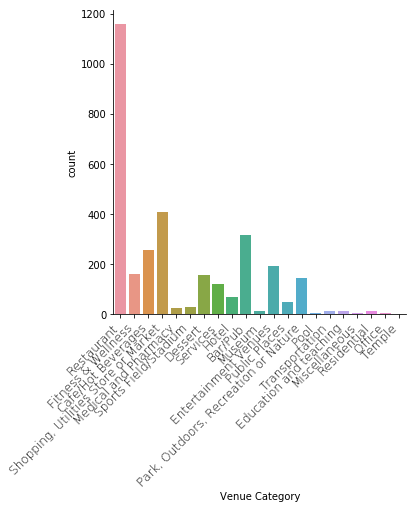

In [42]:
# Plotting each venue_category in accordance with its frequency
g=sns.catplot(x='Venue Category',kind='count',data=newyork_venues)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

In [40]:
# Encoding the venue_categories
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
nyc.iloc[:,7]=le.fit_transform(nyc.iloc[:,7])
mapping=list(le.classes_)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
nyc.head()

Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0  Marble Hill              40.876551               -73.91066   
1           1  Marble Hill              40.876551               -73.91066   
2           2  Marble Hill              40.876551               -73.91066   
3           3  Marble Hill              40.876551               -73.91066   
4           4  Marble Hill              40.876551               -73.91066   

           Venue  Venue Latitude  Venue Longitude  Venue Category  
0       Arturo's       40.874412       -73.910271              15  
1    Bikram Yoga       40.876844       -73.906204               5  
2  Tibbett Diner       40.880404       -73.908937              15  
3      Starbucks       40.877531       -73.905582               1  
4        Dunkin'       40.877136       -73.906666              17

In [41]:
# Stroing the enocded mapping schema for future refrences
mapping
print(le_name_mapping)

{'Bar/Pub': 0, 'Cafe/Hot Beverages': 1, 'Dessert': 2, 'Education and teaching': 3, 'Entertainment Venues': 4, 'Fitness & Wellness': 5, 'Hotel': 6, 'Medical and Pharmacy': 7, 'Miscellaneous': 8, 'Museum': 9, 'Office': 10, 'Park, Outdoors, Recreation or Nature': 11, 'Pool': 12, 'Public Places': 13, 'Residential': 14, 'Restaurant': 15, 'Services': 16, 'Shopping, Utilities Store or Market': 17, 'Sports Field/Stadium': 18, 'Temple': 19, 'Transportation': 20}


In [43]:
# Grouping each neighborhood
newyork_venues.groupby('Neighborhood').count()

Unnamed: 0  Neighborhood Latitude  \
Neighborhood                                             
Battery Park City            66                     66   
Carnegie Hill                87                     87   
Central Harlem               45                     45   
Chelsea                     100                    100   
Chinatown                   100                    100   
Civic Center                 99                     99   
Clinton                     100                    100   
East Harlem                  40                     40   
East Village                100                    100   
Financial District          100                    100   
Flatiron                    100                    100   
Gramercy                     82                     82   
Greenwich Village           100                    100   
Hamilton Heights             59                     59   
Hudson Yards                 56                     56   
Inwood                       57                     57   
Lenox Hill                  100                    100   
Lincoln Square               98                     98   
Little Italy                100                    100   
Lower East Side              48                     48   
Manhattan Valley             40                     40   
Manhattanville               44                     44   
Marble Hill                  25                     25   
Midtown                     100                    100   
Midtown South               100                    100   
Morningside Heights          44                     44   
Murray Hill                  85                     85   
Noho                        100                    100   
Roosevelt Island             27                     27   
Soho                         97                     97   
Stuyvesant Town              16                     16   
Sutton Place                100                    100   
Tribeca                      75                     75   
Tudor City                   75                     75   
Turtle Bay                  100                    100   
Upper East Side              89                     89   
Upper West Side              82                     82   
Washington Heights           85                     85   
West Village                100                    100   
Yorkville                   100                    100   

                     Neighborhood Longitude  Venue  Venue Latitude  \
Neighborhood                                                         
Battery Park City                        66     66              66   
Carnegie Hill                            87     87              87   
Central Harlem                           45     45              45   
Chelsea                                 100    100             100   
Chinatown                               100    100             100   
Civic Center                             99     99              99   
Clinton                                 100    100             100   
East Harlem                              40     40              40   
East Village                            100    100             100   
Financial District                      100    100             100   
Flatiron                                100    100             100   
Gramercy                                 82     82              82   
Greenwich Village                       100    100             100   
Hamilton Heights                         59     59              59   
Hudson Yards                             56     56              56   
Inwood                                   57     57              57   
Lenox Hill                              100    100             100   
Lincoln Square                           98     98              98   
Little Italy                            100    100             100   
Lower East Side                          48     48              48   
Manhattan Valley                         40 

In [44]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

newyork_onehot.head()

Neighborhood  Bar/Pub  Cafe/Hot Beverages  Dessert  Education and teaching  \
0  Marble Hill        0                   0        0                       0   
1  Marble Hill        0                   0        0                       0   
2  Marble Hill        0                   0        0                       0   
3  Marble Hill        0                   1        0                       0   
4  Marble Hill        0                   0        0                       0   

   Entertainment Venues  Fitness & Wellness  Hotel  Medical and Pharmacy  \
0                     0                   0      0                     0   
1                     0                   1      0                     0   
2                     0                   0      0                     0   
3                     0                   0      0                     0   
4                     0                   0      0                     0   

   Miscellaneous  Museum  Office  Park, Outdoors, Recreation or Nature  Pool  \
0              0       0       0                                     0     0   
1              0       0       0                                     0     0   
2              0       0       0                                     0     0   
3              0       0       0                                     0     0   
4              0       0       0                                     0     0   

   Public Places  Residential  Restaurant  Services  \
0              0            0           1         0   
1              0            0           0         0   
2              0            0           1         0   
3              0            0           0         0   
4              0            0           0         0   

   Shopping, Utilities Store or Market  Sports Field/Stadium  Temple  \
0                                    0                     0       0   
1                                    0                     0       0   
2                                    0                     0       0   
3                                    0                     0       0   
4                                    1                     0       0   

   Transportation  
0               0  
1               0  
2               0  
3               0  
4               0

In [45]:
newyork_onehot.shape

(3121, 22)

In [46]:
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index()
newyork_grouped

Neighborhood   Bar/Pub  Cafe/Hot Beverages   Dessert  \
0     Battery Park City  0.075758            0.045455  0.030303   
1         Carnegie Hill  0.137931            0.137931  0.034483   
2        Central Harlem  0.133333            0.044444  0.022222   
3               Chelsea  0.080000            0.110000  0.070000   
4             Chinatown  0.120000            0.080000  0.090000   
5          Civic Center  0.121212            0.090909  0.030303   
6               Clinton  0.120000            0.070000  0.030000   
7           East Harlem  0.050000            0.025000  0.100000   
8          East Village  0.230000            0.070000  0.090000   
9    Financial District  0.120000            0.130000  0.020000   
10             Flatiron  0.070000            0.080000  0.060000   
11             Gramercy  0.182927            0.060976  0.048780   
12    Greenwich Village  0.070000            0.100000  0.080000   
13     Hamilton Heights  0.135593            0.118644  0.033898   
14         Hudson Yards  0.125000            0.053571  0.000000   
15               Inwood  0.087719            0.070175  0.052632   
16           Lenox Hill  0.090000            0.110000  0.040000   
17       Lincoln Square  0.061224            0.081633  0.030612   
18         Little Italy  0.100000            0.100000  0.090000   
19      Lower East Side  0.062500            0.125000  0.062500   
20     Manhattan Valley  0.075000            0.150000  0.050000   
21       Manhattanville  0.068182            0.113636  0.000000   
22          Marble Hill  0.000000            0.080000  0.040000   
23              Midtown  0.030000            0.070000  0.050000   
24        Midtown South  0.090000            0.060000  0.050000   
25  Morningside Heights  0.022727            0.113636  0.022727   
26          Murray Hill  0.105882            0.070588  0.023529   
27                 Noho  0.100000            0.070000  0.050000   
28     Roosevelt Island  0.000000            0.074074  0.000000   
29                 Soho  0.072165            0.082474  0.092784   
30      Stuyvesant Town  0.125000            0.062500  0.000000   
31         Sutton Place  0.120000            0.060000  0.040000   
32              Tribeca  0.106667            0.080000  0.026667   
33           Tudor City  0.026667            0.080000  0.000000   
34           Turtle Bay  0.110000            0.080000  0.010000   
35      Upper East Side  0.078652            0.056180  0.067416   
36      Upper West Side  0.182927            0.048780  0.097561   
37   Washington Heights  0.058824            0.094118  0.058824   
38         West Village  0.150000            0.050000  0.070000   
39            Yorkville  0.110000            0.090000  0.060000   

    Education and teaching  Entertainment Venues  Fitness & Wellness  \
0                 0.015152              0.030303            0.045455   
1                 0.000000              0.022989            0.103448   
2                 0.000000              0.088889            0.066667   
3                 0.000000              0.190000            0.020000   
4                 0.000000              0.030000            0.010000   
5                 0.000000              0.060606            0.080808   
6                 0.010000              0.180000            0.090000   
7                 0.000000              0.050000            0.025000   
8                 0.000000              0.020000            0.000000   
9                 0.000000              0.010000            0.040000   
10                0.010000              0.020000            0.130000   
11                0.000000              0.073171            0.012195   
12                0.010000              0.110000            0.030000   
13                0.033898              0.000000            0.033898   
14                0.017857              0.125000            0.089286   
15                0.000000              0.087719            0.017544   
16                0.010000             

In [47]:
newyork_grouped.shape

(40, 22)

In [48]:
# Extracting top 5 venue categories in each neighborhood by frequency of appearence
num_top_venues = 5

for hood in newyork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = newyork_grouped[newyork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                                  venue  freq
0  Park, Outdoors, Recreation or Nature  0.23
1                            Restaurant  0.20
2   Shopping, Utilities Store or Market  0.11
3                               Bar/Pub  0.08
4                         Public Places  0.08


----Carnegie Hill----
                                 venue  freq
0                           Restaurant  0.32
1                              Bar/Pub  0.14
2                   Cafe/Hot Beverages  0.14
3  Shopping, Utilities Store or Market  0.13
4                   Fitness & Wellness  0.10


----Central Harlem----
                                 venue  freq
0                           Restaurant  0.42
1                              Bar/Pub  0.13
2                 Entertainment Venues  0.09
3  Shopping, Utilities Store or Market  0.09
4                   Fitness & Wellness  0.07


----Chelsea----
                                 venue  freq
0                           Restaurant  0.22
1

                                 venue  freq
0                           Restaurant  0.36
1  Shopping, Utilities Store or Market  0.21
2                              Dessert  0.09
3                   Cafe/Hot Beverages  0.08
4                              Bar/Pub  0.07


----Stuyvesant Town----
                                  venue  freq
0  Park, Outdoors, Recreation or Nature  0.25
1                               Bar/Pub  0.12
2                  Sports Field/Stadium  0.12
3                              Services  0.12
4                    Cafe/Hot Beverages  0.06


----Sutton Place----
                                 venue  freq
0                           Restaurant  0.28
1  Shopping, Utilities Store or Market  0.19
2                              Bar/Pub  0.12
3                   Fitness & Wellness  0.10
4                             Services  0.07


----Tribeca----
                                  venue  freq
0                            Restaurant  0.33
1  Park, Outdoors, Recrea

In [49]:
# Creating a function to extract most common venues in each category
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
# Compiling a dataset with top 10 most common venue categories in each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = newyork_grouped['Neighborhood']

for ind in np.arange(newyork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood                 1st Most Common Venue  \
0  Battery Park City  Park, Outdoors, Recreation or Nature   
1      Carnegie Hill                            Restaurant   
2     Central Harlem                            Restaurant   
3            Chelsea                            Restaurant   
4          Chinatown                            Restaurant   

                 2nd Most Common Venue                3rd Most Common Venue  \
0                           Restaurant  Shopping, Utilities Store or Market   
1                              Bar/Pub                   Cafe/Hot Beverages   
2                              Bar/Pub  Shopping, Utilities Store or Market   
3  Shopping, Utilities Store or Market                 Entertainment Venues   
4  Shopping, Utilities Store or Market                              Bar/Pub   

                 4th Most Common Venue 5th Most Common Venue  \
0                              Bar/Pub         Public Places   
1  Shopping, Utilities Store or Market    Fitness & Wellness   
2                 Entertainment Venues              Services   
3                   Cafe/Hot Beverages               Bar/Pub   
4                              Dessert    Cafe/Hot Beverages   

  6th Most Common Venue 7th Most Common Venue  \
0                 Hotel  Sports Field/Stadium   
1              Services               Dessert   
2    Fitness & Wellness    Cafe/Hot Beverages   
3               Dessert              Services   
4              Services  Entertainment Venues   

                  8th Most Common Venue 9th Most Common Venue  \
0                    Cafe/Hot Beverages    Fitness & Wellness   
1                  Entertainment Venues                Museum   
2                  Sports Field/Stadium         Public Places   
3  Park, Outdoors, Recreation or Nature  Medical and Pharmacy   
4                                 Hotel  Sports Field/Stadium   

  10th Most Common Venue  
0                Dessert  
1                  Hotel  
2                Dessert  
3     Fitness & Wellness  
4          Public Places

In [51]:
# set number of clusters
kclusters = 5

newyork_grouped_clustering = newyork_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 0, 4, 0, 4, 4, 0, 0, 0], dtype=int32)

In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

newyork_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
newyork_merged = newyork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

newyork_merged.head() # check the last columns!

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               2   
1  Manhattan           Chinatown  40.715618 -73.994279               0   
2  Manhattan  Washington Heights  40.851903 -73.936900               2   
3  Manhattan              Inwood  40.867684 -73.921210               0   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               0   

  1st Most Common Venue                2nd Most Common Venue  \
0            Restaurant  Shopping, Utilities Store or Market   
1            Restaurant  Shopping, Utilities Store or Market   
2            Restaurant  Shopping, Utilities Store or Market   
3            Restaurant  Shopping, Utilities Store or Market   
4            Restaurant                              Bar/Pub   

  3rd Most Common Venue                4th Most Common Venue  \
0    Fitness & Wellness                   Cafe/Hot Beverages   
1               Bar/Pub                              Dessert   
2    Cafe/Hot Beverages                              Bar/Pub   
3               Bar/Pub                 Entertainment Venues   
4    Cafe/Hot Beverages  Shopping, Utilities Store or Market   

  5th Most Common Venue                 6th Most Common Venue  \
0  Medical and Pharmacy                  Sports Field/Stadium   
1    Cafe/Hot Beverages                              Services   
2               Dessert                              Services   
3    Cafe/Hot Beverages  Park, Outdoors, Recreation or Nature   
4               Dessert                Education and teaching   

                  7th Most Common Venue 8th Most Common Venue  \
0                              Services               Dessert   
1                  Entertainment Venues                 Hotel   
2  Park, Outdoors, Recreation or Nature    Fitness & Wellness   
3                               Dessert  Medical and Pharmacy   
4                    Fitness & Wellness              Services   

  9th Most Common Venue                10th Most Common Venue  
0        Transportation                Education and teaching  
1  Sports Field/Stadium                         Public Places  
2         Public Places                                  Pool  
3                Museum                    Fitness & Wellness  
4         Public Places  Park, Outdoors, Recreation or Nature

In [53]:
newyork_merged

Borough         Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Manhattan          Marble Hill  40.876551 -73.910660               2   
1   Manhattan            Chinatown  40.715618 -73.994279               0   
2   Manhattan   Washington Heights  40.851903 -73.936900               2   
3   Manhattan               Inwood  40.867684 -73.921210               0   
4   Manhattan     Hamilton Heights  40.823604 -73.949688               0   
5   Manhattan       Manhattanville  40.816934 -73.957385               3   
6   Manhattan       Central Harlem  40.815976 -73.943211               0   
7   Manhattan          East Harlem  40.792249 -73.944182               0   
8   Manhattan      Upper East Side  40.775639 -73.960508               2   
9   Manhattan            Yorkville  40.775930 -73.947118               0   
10  Manhattan           Lenox Hill  40.768113 -73.958860               2   
11  Manhattan     Roosevelt Island  40.762160 -73.949168               1   
12  Manhattan      Upper West Side  40.787658 -73.977059               0   
13  Manhattan       Lincoln Square  40.773529 -73.985338               4   
14  Manhattan              Clinton  40.759101 -73.996119               4   
15  Manhattan              Midtown  40.754691 -73.981669               2   
16  Manhattan          Murray Hill  40.748303 -73.978332               0   
17  Manhattan              Chelsea  40.744035 -74.003116               4   
18  Manhattan    Greenwich Village  40.726933 -73.999914               0   
19  Manhattan         East Village  40.727847 -73.982226               0   
20  Manhattan      Lower East Side  40.717807 -73.980890               4   
21  Manhattan              Tribeca  40.721522 -74.010683               4   
22  Manhattan         Little Italy  40.719324 -73.997305               2   
23  Manhattan                 Soho  40.722184 -74.000657               2   
24  Manhattan         West Village  40.734434 -74.006180               4   
25  Manhattan     Manhattan Valley  40.797307 -73.964286               3   
26  Manhattan  Morningside Heights  40.808000 -73.963896               3   
27  Manhattan             Gramercy  40.737210 -73.981376               4   
28  Manhattan    Battery Park City  40.711932 -74.016869               1   
29  Manhattan   Financial District  40.707107 -74.010665               0   
30  Manhattan        Carnegie Hill  40.782683 -73.953256               2   
31  Manhattan                 Noho  40.723259 -73.988434               0   
32  Manhattan         Civic Center  40.715229 -74.005415               4   
33  Manhattan        Midtown South  40.748510 -73.988713               0   
34  Manhattan         Sutton Place  40.760280 -73.963556               2   
35  Manhattan           Turtle Bay  40.752042 -73.967708               3   
36  Manhattan           Tudor City  40.746917 -73.971219               3   
37  Manhattan      Stuyvesant Town  40.731000 -73.974052               1   
38  Manhattan             Flatiron  40.739673 -73.990947               2   
39  Manhattan         Hudson Yards  40.756658 -74.000111               4   

                   1st Most Common Venue  \
0                             Restaurant   
1                             Restaurant   
2                             Restaurant   
3                             Restaurant   
4                             Restaurant   
5                             Restaurant   
6                             Restaurant   
7                             Restaurant   
8                             Restaurant   
9                             Restaurant   
10                            Restaurant   
11                            Restaurant   
12                            Restaurant   
13                            Restaurant   
14                            Restaurant   
15                            Restaurant   
16                            Restaurant   
17                            Restaurant   
18                            Restaurant   
19       

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged['Latitude'], newyork_merged['Longitude'], newyork_merged['Neighborhood'], newyork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<Figure size 1440x720 with 0 Axes>

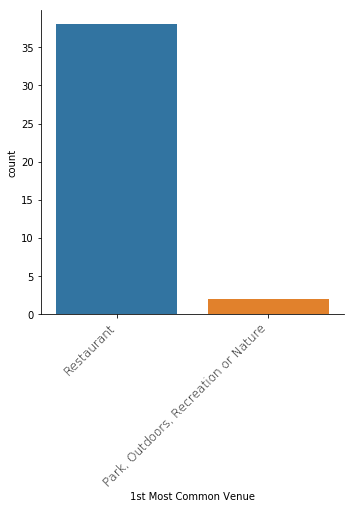

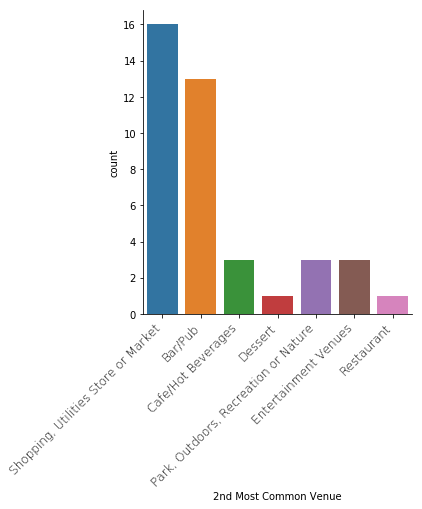

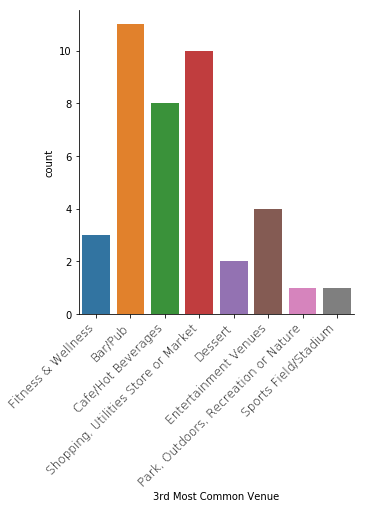

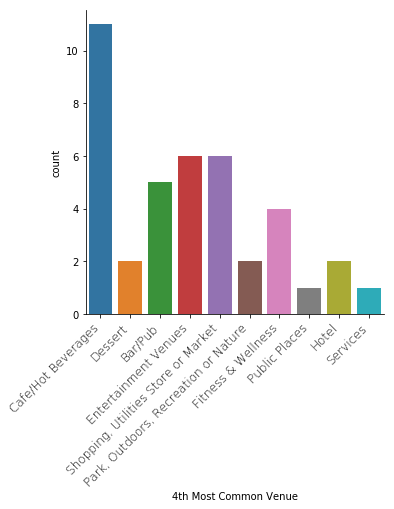

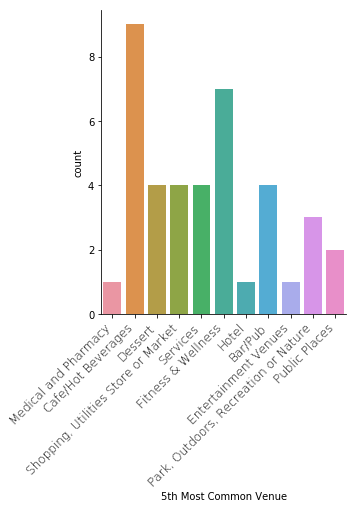

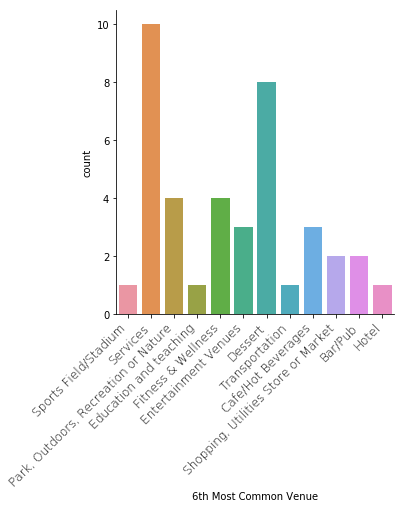

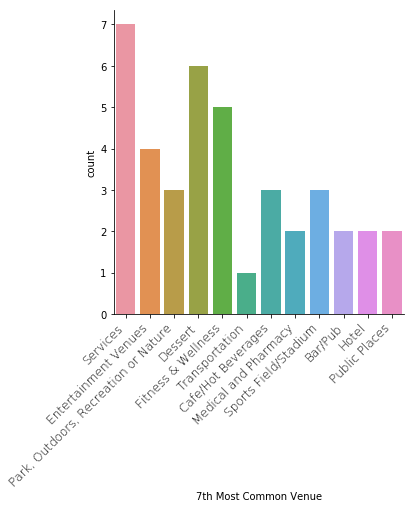

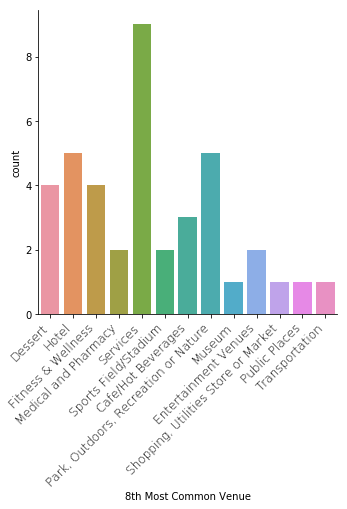

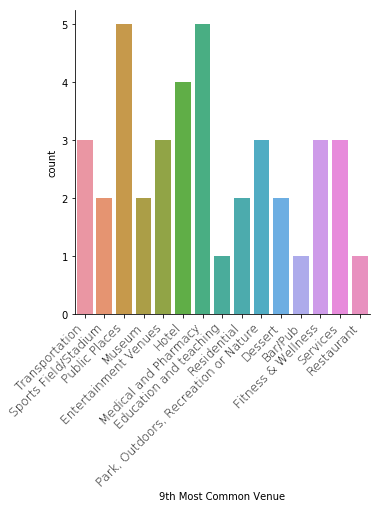

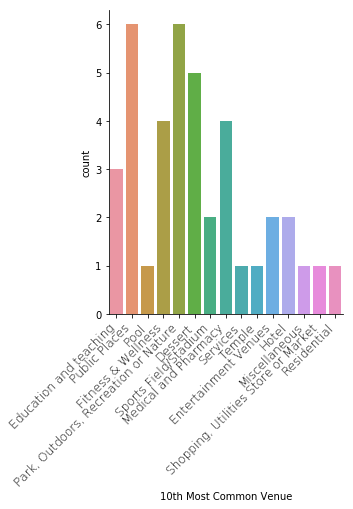

In [57]:
# Plotting most common venue categories by frequency
plt.figure(figsize=[20,10])
sns.catplot(x='1st Most Common Venue',kind='count',data=newyork_merged)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='2nd Most Common Venue',kind='count',data=newyork_merged)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='3rd Most Common Venue',kind='count',data=newyork_merged)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='4th Most Common Venue',kind='count',data=newyork_merged)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='5th Most Common Venue',kind='count',data=newyork_merged)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='6th Most Common Venue',kind='count',data=newyork_merged)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='7th Most Common Venue',kind='count',data=newyork_merged)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='8th Most Common Venue',kind='count',data=newyork_merged)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='9th Most Common Venue',kind='count',data=newyork_merged)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='10th Most Common Venue',kind='count',data=newyork_merged)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

In [58]:
# Cluster 1
newyork_merged_1=newyork_merged.loc[newyork_merged['Cluster Labels'] == 0, newyork_merged.columns[[1] + list(range(5, newyork_merged.shape[1]))]]
newyork_merged_1

Neighborhood 1st Most Common Venue  \
1            Chinatown            Restaurant   
3               Inwood            Restaurant   
4     Hamilton Heights            Restaurant   
6       Central Harlem            Restaurant   
7          East Harlem            Restaurant   
9            Yorkville            Restaurant   
12     Upper West Side            Restaurant   
16         Murray Hill            Restaurant   
18   Greenwich Village            Restaurant   
19        East Village            Restaurant   
29  Financial District            Restaurant   
31                Noho            Restaurant   
33       Midtown South            Restaurant   

                  2nd Most Common Venue                3rd Most Common Venue  \
1   Shopping, Utilities Store or Market                              Bar/Pub   
3   Shopping, Utilities Store or Market                              Bar/Pub   
4                               Bar/Pub                   Cafe/Hot Beverages   
6                               Bar/Pub  Shopping, Utilities Store or Market   
7                               Dessert  Shopping, Utilities Store or Market   
9                               Bar/Pub                   Cafe/Hot Beverages   
12                              Bar/Pub                              Dessert   
16                              Bar/Pub                   Fitness & Wellness   
18                 Entertainment Venues                   Cafe/Hot Beverages   
19                              Bar/Pub  Shopping, Utilities Store or Market   
29                   Cafe/Hot Beverages                              Bar/Pub   
31  Shopping, Utilities Store or Market                              Bar/Pub   
33  Shopping, Utilities Store or Market                              Bar/Pub   

                  4th Most Common Venue                 5th Most Common Venue  \
1                               Dessert                    Cafe/Hot Beverages   
3                  Entertainment Venues                    Cafe/Hot Beverages   
4   Shopping, Utilities Store or Market                               Dessert   
6                  Entertainment Venues                              Services   
7                               Bar/Pub                              Services   
9                    Fitness & Wellness   Shopping, Utilities Store or Market   
12  Shopping, Utilities Store or Market                    Cafe/Hot Beverages   
16                                Hotel                    Cafe/Hot Beverages   
18  Shopping, Utilities Store or Market                               Dessert   
19                              Dessert                    Cafe/Hot Beverages   
29  Shopping, Utilities Store or Market  Park, Outdoors, Recreation or Nature   
31                 Entertainment Venues                    Cafe/Hot Beverages   
33                                Hotel                    Cafe/Hot Beverages   

                   6th Most Common Venue 7th Most Common Venue  \
1                               Services  Entertainment Venues   
3   Park, Outdoors, Recreation or Nature               Dessert   
4                 Education and teaching    Fitness & Wellness   
6                     Fitness & Wellness    Cafe/Hot Beverages   
7                   Entertainment Venues  Medical and Pharmacy   
9                               Services               Dessert   
12                    Fitness & Wellness              Services   
16   Shopping, Utilities Store or Market               Dessert   
18                               Bar/Pub              Services   
19  Park, Outdoors, Recreation or Nature              Services   
29                    Fitness & Wellness         Public Places   
31                               Dessert    Fitness & Wellness   
33                  Entertainment Venues    Fitness & Wellness   

                   8th Most Common Venue 9th Most Common Venue  \
1                                  Hotel  Sports Field/Stadium   
3                   Medi

In [59]:
# Cluster 2
newyork_merged_2=newyork_merged.loc[newyork_merged['Cluster Labels'] == 1, newyork_merged.columns[[1] + list(range(5, newyork_merged.shape[1]))]]
newyork_merged_2

Neighborhood                 1st Most Common Venue  \
11   Roosevelt Island                            Restaurant   
28  Battery Park City  Park, Outdoors, Recreation or Nature   
37    Stuyvesant Town  Park, Outdoors, Recreation or Nature   

                   2nd Most Common Venue                3rd Most Common Venue  \
11  Park, Outdoors, Recreation or Nature  Shopping, Utilities Store or Market   
28                            Restaurant  Shopping, Utilities Store or Market   
37                               Bar/Pub                 Sports Field/Stadium   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
11    Cafe/Hot Beverages    Fitness & Wellness        Transportation   
28               Bar/Pub         Public Places                 Hotel   
37              Services         Public Places    Cafe/Hot Beverages   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
11  Sports Field/Stadium              Services           Residential   
28  Sports Field/Stadium    Cafe/Hot Beverages    Fitness & Wellness   
37    Fitness & Wellness        Transportation            Restaurant   

                 10th Most Common Venue  
11                        Public Places  
28                              Dessert  
37  Shopping, Utilities Store or Market

In [60]:
# Cluster 3
newyork_merged_3=newyork_merged.loc[newyork_merged['Cluster Labels'] == 2, newyork_merged.columns[[1] + list(range(5, newyork_merged.shape[1]))]]
newyork_merged_3

Neighborhood 1st Most Common Venue  \
0          Marble Hill            Restaurant   
2   Washington Heights            Restaurant   
8      Upper East Side            Restaurant   
10          Lenox Hill            Restaurant   
15             Midtown            Restaurant   
22        Little Italy            Restaurant   
23                Soho            Restaurant   
30       Carnegie Hill            Restaurant   
34        Sutton Place            Restaurant   
38            Flatiron            Restaurant   

                  2nd Most Common Venue 3rd Most Common Venue  \
0   Shopping, Utilities Store or Market    Fitness & Wellness   
2   Shopping, Utilities Store or Market    Cafe/Hot Beverages   
8   Shopping, Utilities Store or Market               Bar/Pub   
10  Shopping, Utilities Store or Market    Cafe/Hot Beverages   
15  Shopping, Utilities Store or Market  Entertainment Venues   
22  Shopping, Utilities Store or Market               Bar/Pub   
23  Shopping, Utilities Store or Market               Dessert   
30                              Bar/Pub    Cafe/Hot Beverages   
34  Shopping, Utilities Store or Market               Bar/Pub   
38  Shopping, Utilities Store or Market    Fitness & Wellness   

                  4th Most Common Venue 5th Most Common Venue  \
0                    Cafe/Hot Beverages  Medical and Pharmacy   
2                               Bar/Pub               Dessert   
8                  Entertainment Venues    Fitness & Wellness   
10                              Bar/Pub    Fitness & Wellness   
15                   Cafe/Hot Beverages                 Hotel   
22                   Cafe/Hot Beverages               Dessert   
23                   Cafe/Hot Beverages               Bar/Pub   
30  Shopping, Utilities Store or Market    Fitness & Wellness   
34                   Fitness & Wellness              Services   
38                   Cafe/Hot Beverages               Bar/Pub   

   6th Most Common Venue                 7th Most Common Venue  \
0   Sports Field/Stadium                              Services   
2               Services  Park, Outdoors, Recreation or Nature   
8                Dessert                    Cafe/Hot Beverages   
10  Entertainment Venues                               Dessert   
15               Dessert                              Services   
22              Services                  Entertainment Venues   
23              Services                  Entertainment Venues   
30              Services                               Dessert   
34    Cafe/Hot Beverages  Park, Outdoors, Recreation or Nature   
38               Dessert                              Services   

                   8th Most Common Venue  \
0                                Dessert   
2                     Fitness & Wellness   
8                               Services   
10                              Services   
15                    Fitness & Wellness   
22                                 Hotel   
23                    Fitness & Wellness   
30                  Entertainment Venues   
34                               Dessert   
38  Park, Outdoors, Recreation or Nature   

                   9th Most Common Venue                10th Most Common Venue  
0                         Transportation                Education and teaching  
2                          Public Places                                  Pool  
8                                  Hotel                         Public Places  
10                Education and teaching  Park, Outdoors, Recreation or Nature  
15                               Bar/Pub                         Public Places  
22  Park, Outdoors, Recreation or Nature                    Fitness & Wellness  
23                                 Hotel  Park, Outdoors, Recreation or Nature  
30                                Museum                                 Hotel  
34                                 Hotel                  Sports Field/Stadium  
38                  Enterta

In [61]:
# Cluster 4
newyork_merged_4=newyork_merged.loc[newyork_merged['Cluster Labels'] == 3, newyork_merged.columns[[1] + list(range(5, newyork_merged.shape[1]))]]
newyork_merged_4

Neighborhood 1st Most Common Venue  \
5        Manhattanville            Restaurant   
25     Manhattan Valley            Restaurant   
26  Morningside Heights            Restaurant   
35           Turtle Bay            Restaurant   
36           Tudor City            Restaurant   

                   2nd Most Common Venue  \
5                     Cafe/Hot Beverages   
25                    Cafe/Hot Beverages   
26   Shopping, Utilities Store or Market   
35                               Bar/Pub   
36  Park, Outdoors, Recreation or Nature   

                   3rd Most Common Venue  \
5                                Bar/Pub   
25   Shopping, Utilities Store or Market   
26                    Cafe/Hot Beverages   
35  Park, Outdoors, Recreation or Nature   
36                    Cafe/Hot Beverages   

                   4th Most Common Venue  \
5   Park, Outdoors, Recreation or Nature   
25                               Bar/Pub   
26  Park, Outdoors, Recreation or Nature   
35                    Cafe/Hot Beverages   
36                    Fitness & Wellness   

                   5th Most Common Venue 6th Most Common Venue  \
5    Shopping, Utilities Store or Market    Fitness & Wellness   
25  Park, Outdoors, Recreation or Nature               Dessert   
26                              Services               Bar/Pub   
35   Shopping, Utilities Store or Market              Services   
36   Shopping, Utilities Store or Market              Services   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
5         Transportation              Services  Entertainment Venues   
25    Fitness & Wellness              Services           Residential   
26  Medical and Pharmacy  Sports Field/Stadium               Dessert   
35         Public Places    Fitness & Wellness  Medical and Pharmacy   
36               Bar/Pub         Public Places  Medical and Pharmacy   

   10th Most Common Venue  
5           Public Places  
25   Medical and Pharmacy  
26   Entertainment Venues  
35                  Hotel  
36   Entertainment Venues

In [62]:
# Cluster 5
newyork_merged_5=newyork_merged.loc[newyork_merged['Cluster Labels'] == 4, newyork_merged.columns[[1] + list(range(5, newyork_merged.shape[1]))]]
newyork_merged_5

Neighborhood 1st Most Common Venue  \
13   Lincoln Square            Restaurant   
14          Clinton            Restaurant   
17          Chelsea            Restaurant   
20  Lower East Side            Restaurant   
21          Tribeca            Restaurant   
24     West Village            Restaurant   
27         Gramercy            Restaurant   
32     Civic Center            Restaurant   
39     Hudson Yards            Restaurant   

                   2nd Most Common Venue                3rd Most Common Venue  \
13                  Entertainment Venues  Shopping, Utilities Store or Market   
14                  Entertainment Venues                              Bar/Pub   
17   Shopping, Utilities Store or Market                 Entertainment Venues   
20   Shopping, Utilities Store or Market                 Entertainment Venues   
21  Park, Outdoors, Recreation or Nature                              Bar/Pub   
24                               Bar/Pub  Shopping, Utilities Store or Market   
27                               Bar/Pub  Shopping, Utilities Store or Market   
32                               Bar/Pub  Shopping, Utilities Store or Market   
39                               Bar/Pub                 Entertainment Venues   

                  4th Most Common Venue                 5th Most Common Venue  \
13                        Public Places                    Fitness & Wellness   
14                   Fitness & Wellness                    Cafe/Hot Beverages   
17                   Cafe/Hot Beverages                               Bar/Pub   
20                   Cafe/Hot Beverages                               Bar/Pub   
21                   Cafe/Hot Beverages                  Entertainment Venues   
24                 Entertainment Venues  Park, Outdoors, Recreation or Nature   
27                 Entertainment Venues                    Cafe/Hot Beverages   
32                   Cafe/Hot Beverages                    Fitness & Wellness   
39  Shopping, Utilities Store or Market                    Fitness & Wellness   

                   6th Most Common Venue  \
13                    Cafe/Hot Beverages   
14   Shopping, Utilities Store or Market   
17                               Dessert   
20                               Dessert   
21                              Services   
24                               Dessert   
27  Park, Outdoors, Recreation or Nature   
32                              Services   
39  Park, Outdoors, Recreation or Nature   

                   7th Most Common Venue  \
13                               Bar/Pub   
14                                 Hotel   
17                              Services   
20  Park, Outdoors, Recreation or Nature   
21                  Sports Field/Stadium   
24                    Cafe/Hot Beverages   
27                               Dessert   
32                  Entertainment Venues   
39                                 Hotel   

                   8th Most Common Venue  \
13                               Dessert   
14                              Services   
17  Park, Outdoors, Recreation or Nature   
20                  Medical and Pharmacy   
21   Shopping, Utilities Store or Market   
24                              Services   
27                              Services   
32                                 Hotel   
39                    Cafe/Hot Beverages   

                   9th Most Common Venue                10th Most Common Venue  
13  Park, Outdoors, Recreation or Nature                              Services  
14                               Dessert  Park, Outdoors, Recreation or Nature  
17                  Medical and Pharmacy                    Fitness & Wellness  
20                  Sports Field/Stadium                    Fitness & Wellness  
21                    Fitness & Wellness                               Dessert  
24                         Public Places                                Temple  
27                                 Hotel    

<Figure size 1440x720 with 0 Axes>

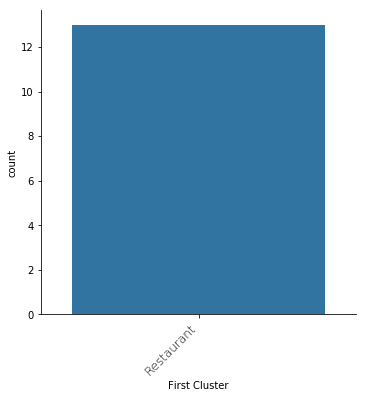

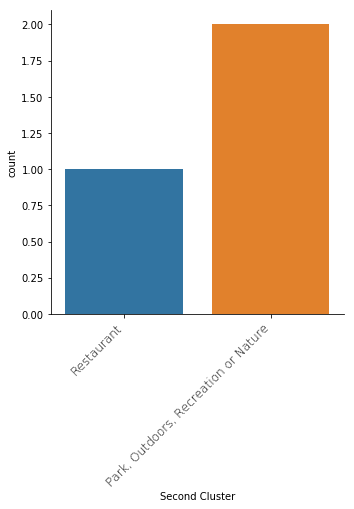

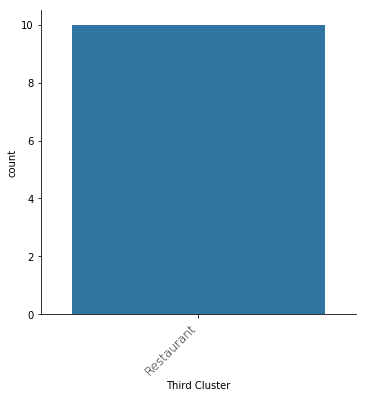

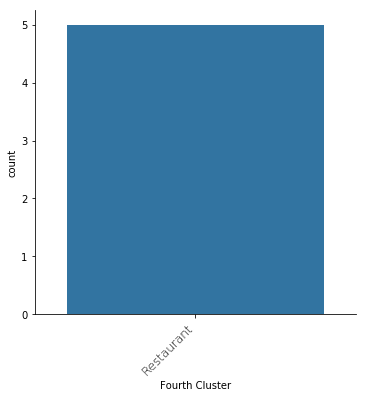

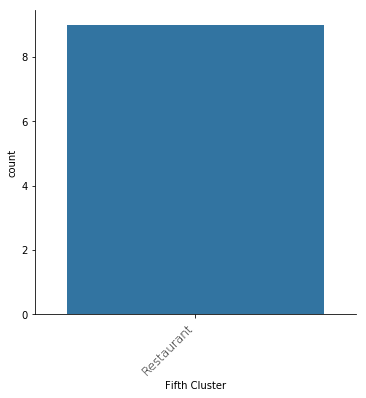

In [63]:
## Analysing 1st Most Common Venue in all 5 clusters
plt.figure(figsize=[20,10])
sns.catplot(x='1st Most Common Venue',kind='count',data=newyork_merged_1)
plt.xlabel("First Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='1st Most Common Venue',kind='count',data=newyork_merged_2)
plt.xlabel("Second Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='1st Most Common Venue',kind='count',data=newyork_merged_3)
plt.xlabel("Third Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='1st Most Common Venue',kind='count',data=newyork_merged_4)
plt.xlabel("Fourth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='1st Most Common Venue',kind='count',data=newyork_merged_5)
plt.xlabel("Fifth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

<Figure size 1440x720 with 0 Axes>

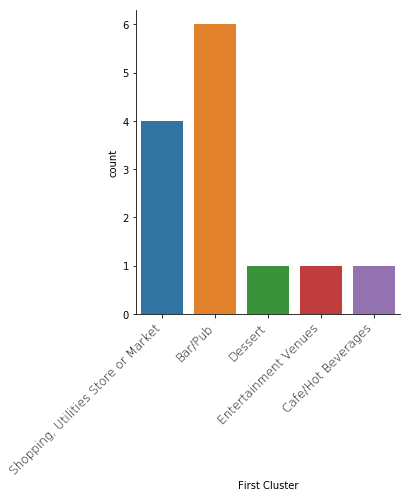

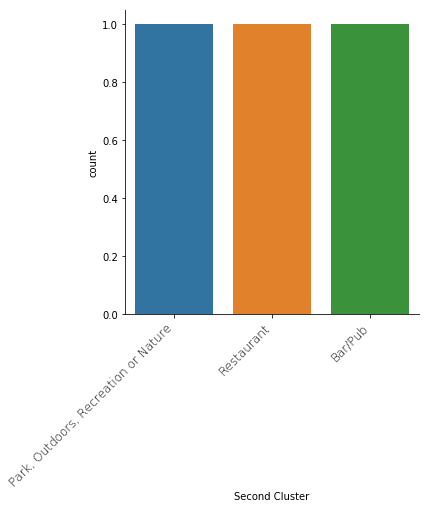

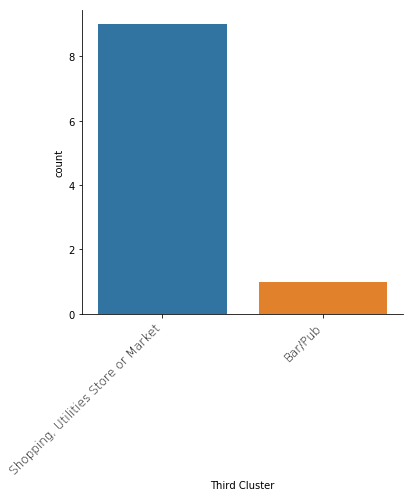

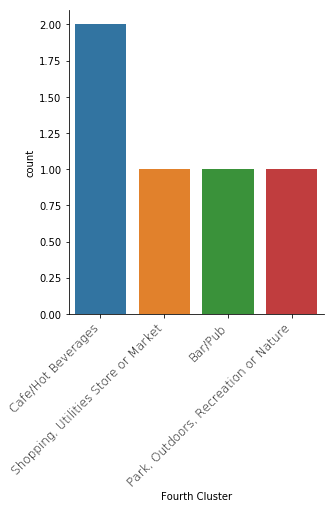

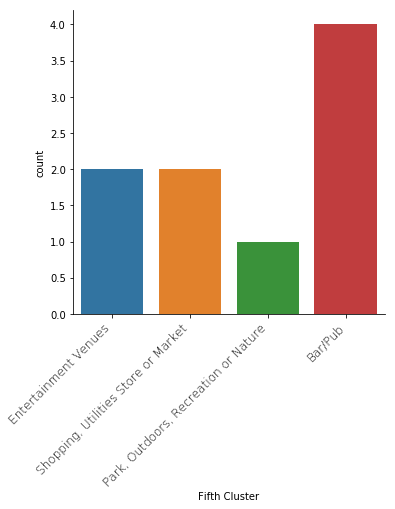

In [64]:
## Analysing the 2nd most common venue for all 5 clusters 
plt.figure(figsize=[20,10])
sns.catplot(x='2nd Most Common Venue',kind='count',data=newyork_merged_1)
plt.xlabel("First Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='2nd Most Common Venue',kind='count',data=newyork_merged_2)
plt.xlabel("Second Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='2nd Most Common Venue',kind='count',data=newyork_merged_3)
plt.xlabel("Third Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='2nd Most Common Venue',kind='count',data=newyork_merged_4)
plt.xlabel("Fourth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='2nd Most Common Venue',kind='count',data=newyork_merged_5)
plt.xlabel("Fifth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

<Figure size 1440x720 with 0 Axes>

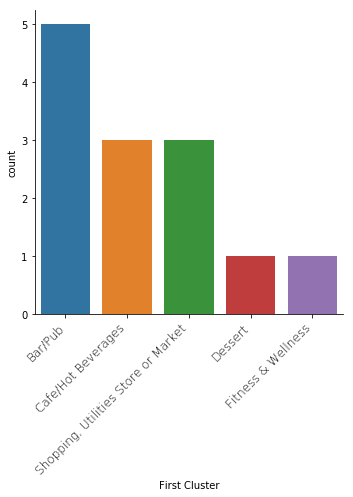

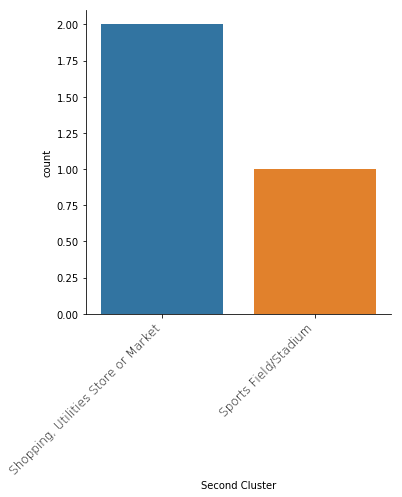

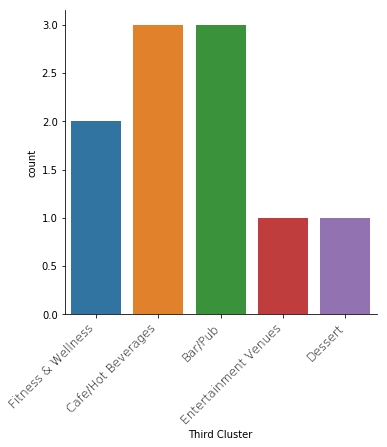

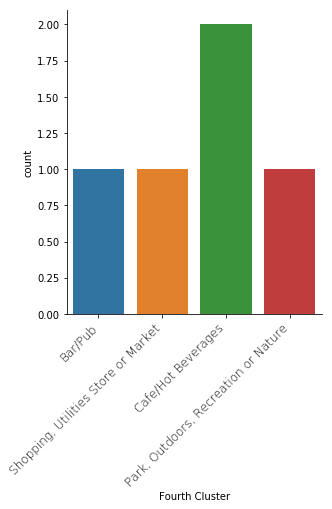

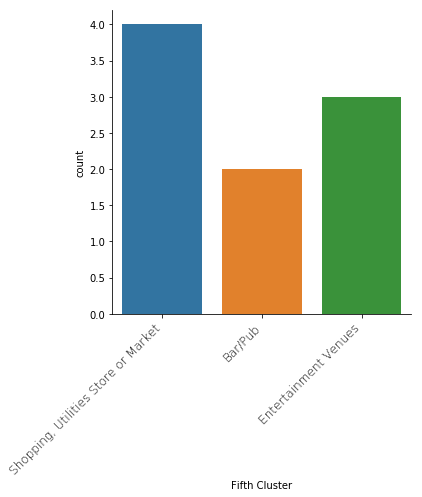

In [65]:
## Analysing the 3rd most common venue for all 5 clusters 
plt.figure(figsize=[20,10])
sns.catplot(x='3rd Most Common Venue',kind='count',data=newyork_merged_1)
plt.xlabel("First Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='3rd Most Common Venue',kind='count',data=newyork_merged_2)
plt.xlabel("Second Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='3rd Most Common Venue',kind='count',data=newyork_merged_3)
plt.xlabel("Third Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='3rd Most Common Venue',kind='count',data=newyork_merged_4)
plt.xlabel("Fourth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='3rd Most Common Venue',kind='count',data=newyork_merged_5)
plt.xlabel("Fifth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

Analysing the 4th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

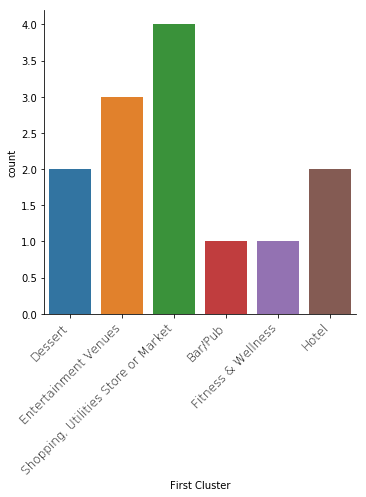

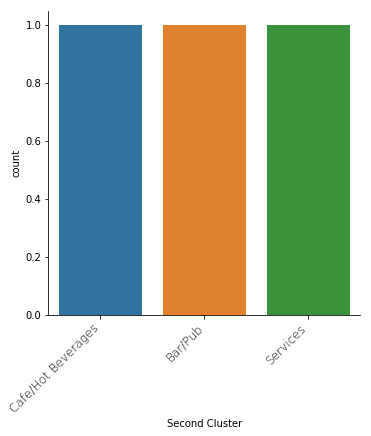

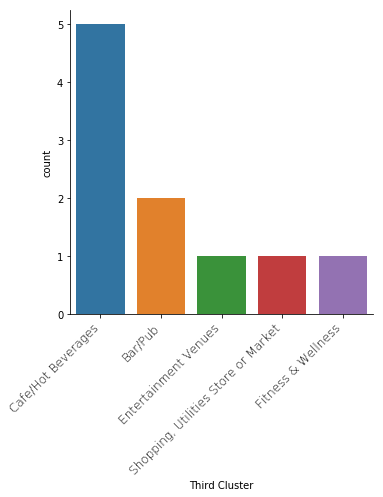

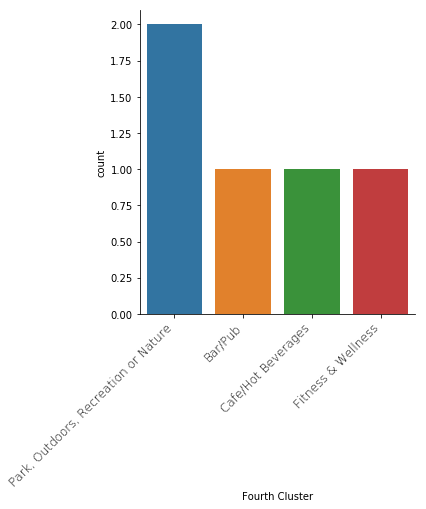

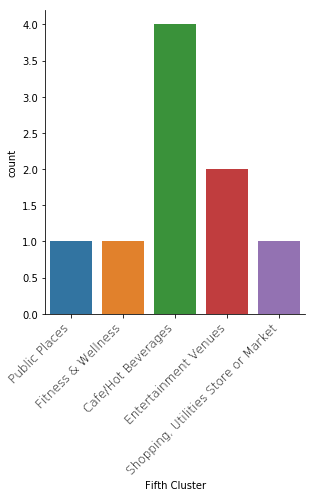

Analysing the 5th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

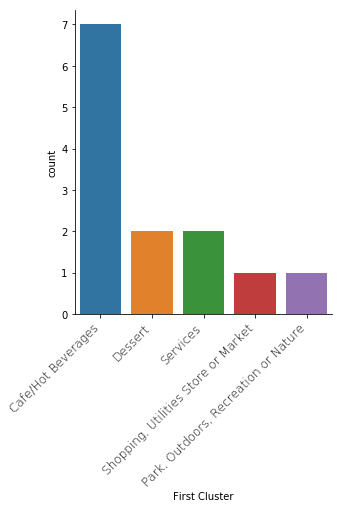

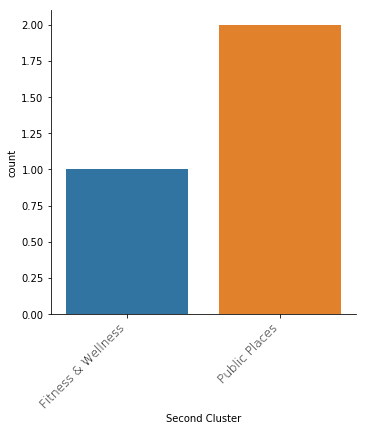

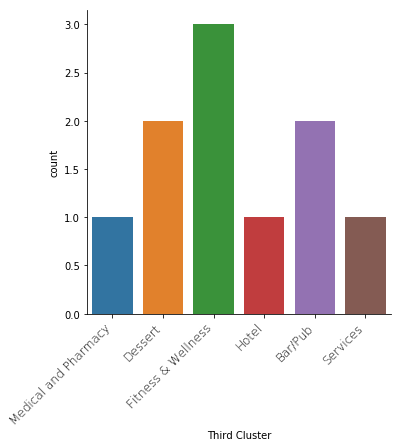

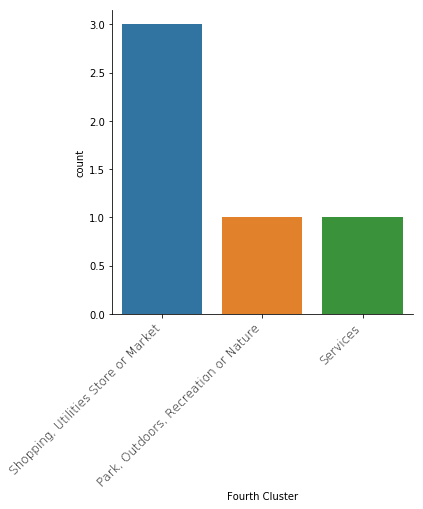

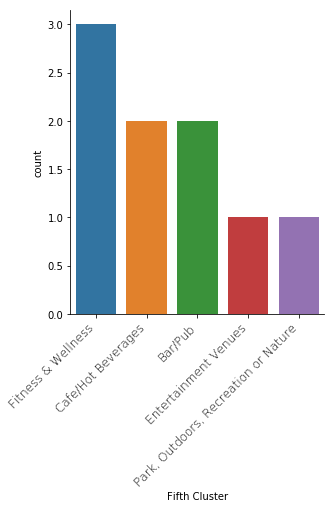

Analysing the 6th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

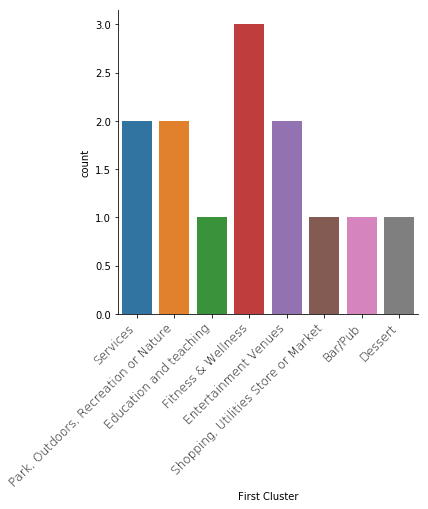

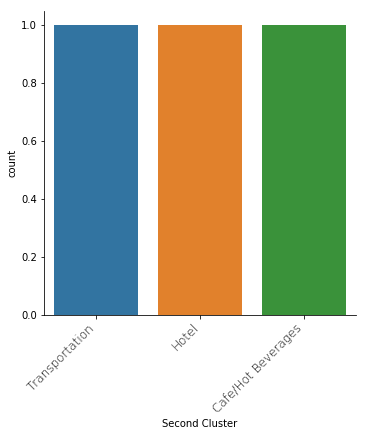

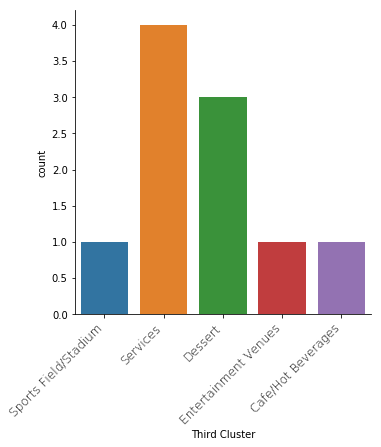

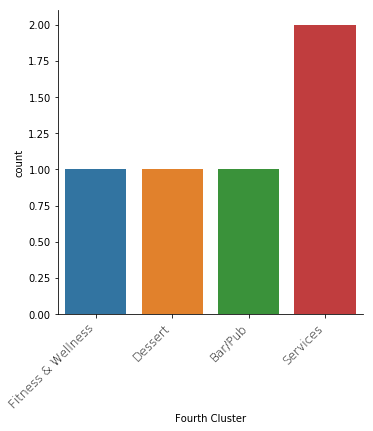

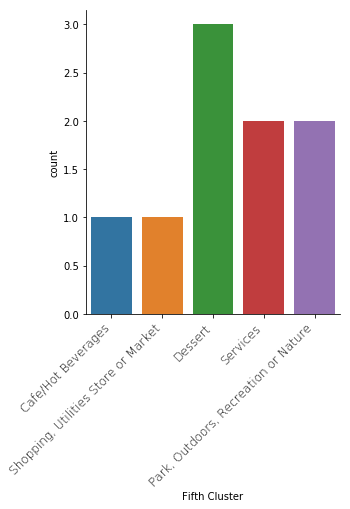

Analysing the 7th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

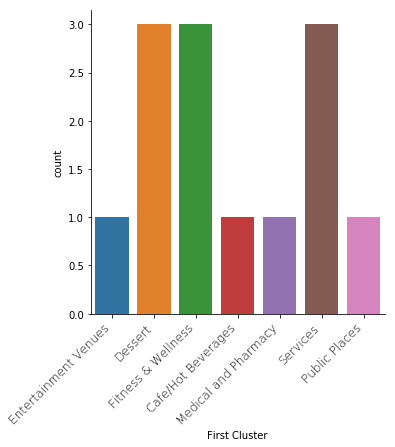

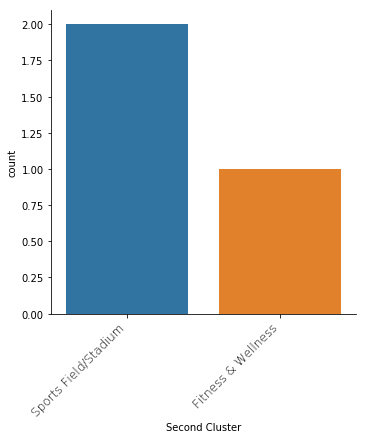

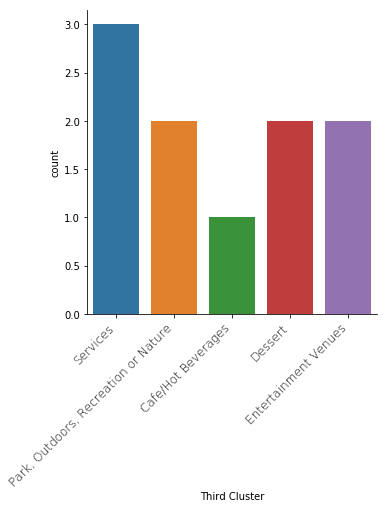

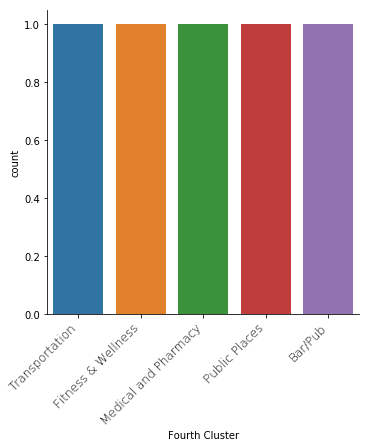

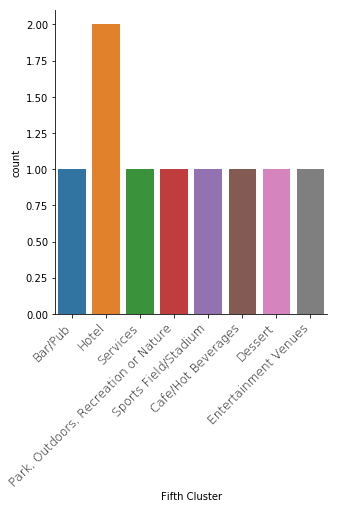

Analysing the 8th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

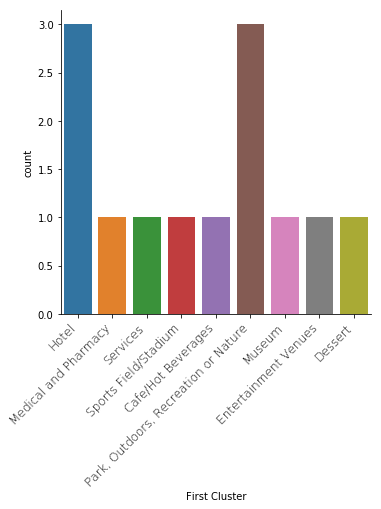

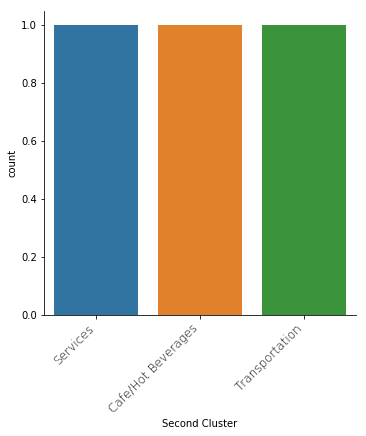

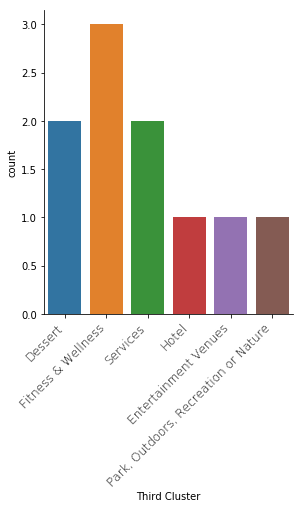

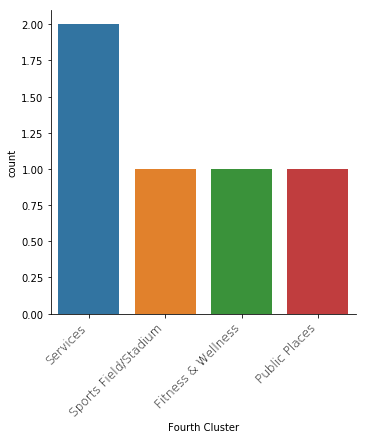

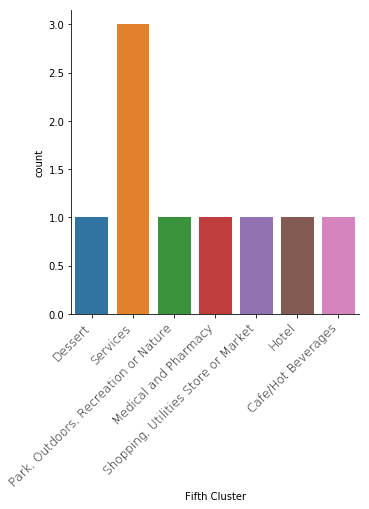

Analysing the 9th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

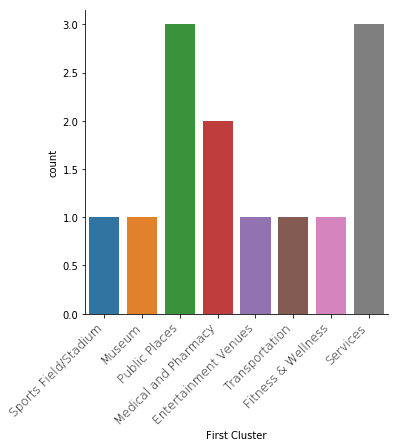

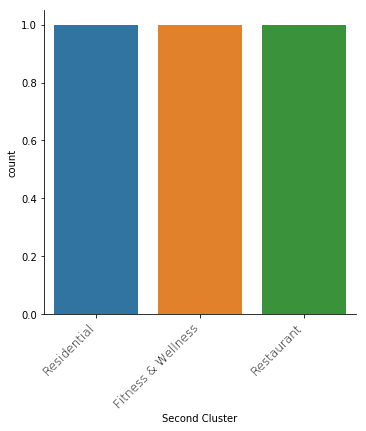

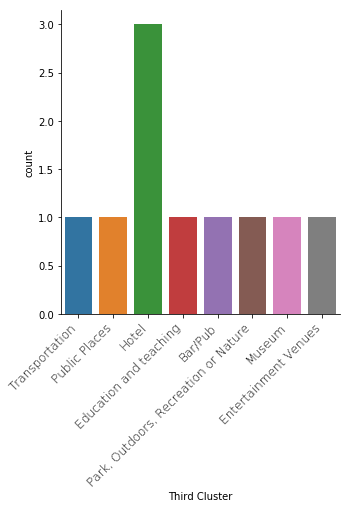

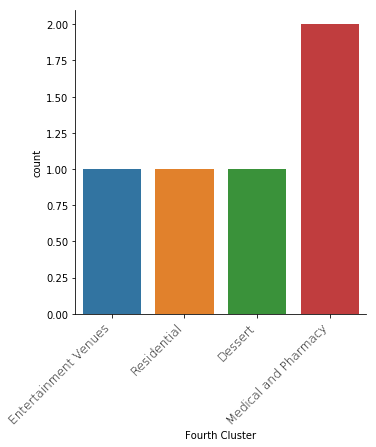

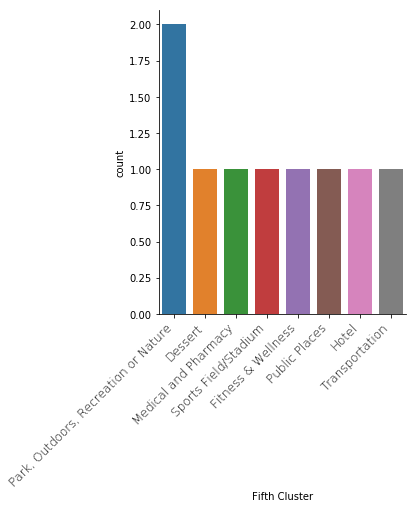

Analysing the 10th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

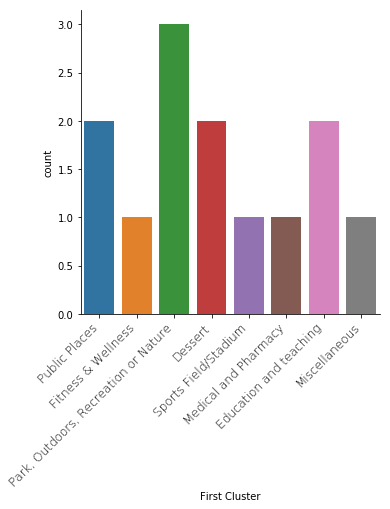

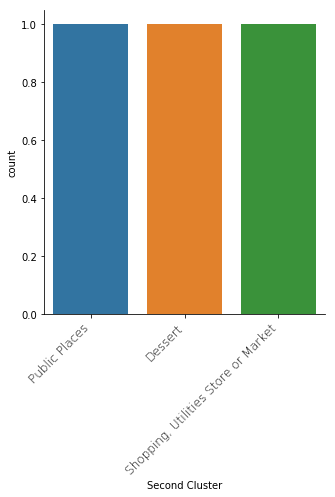

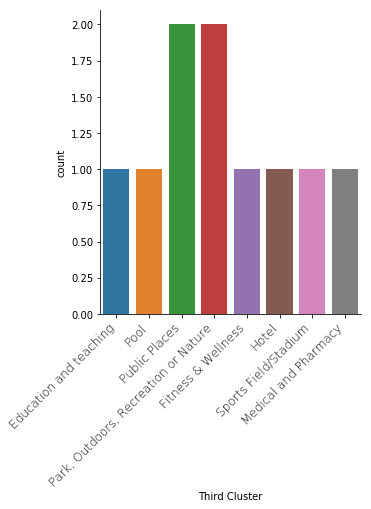

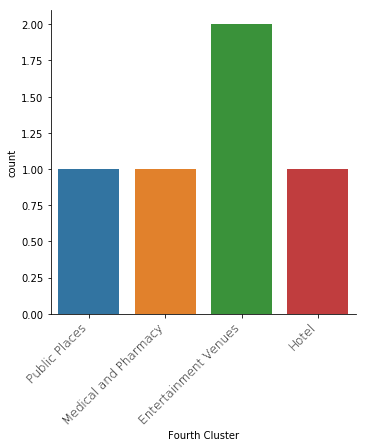

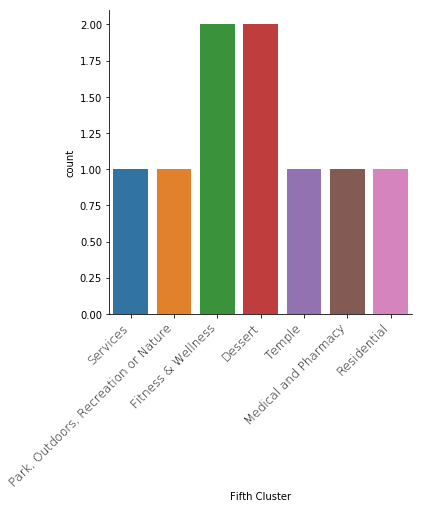

In [66]:
# Analysing all rest venue counts of most common venue categories
for i in range(7):
    print("Analysing the {}th most common venue for all 5 clusters".format(i+4)) 
    plt.figure(figsize=[20,10])
    xcol = "{}th Most Common Venue".format(i+4)
    
    sns.catplot(x=xcol,kind='count',data=newyork_merged_1)
    plt.xlabel("First Cluster")
    plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
    )
    plt.show()

    sns.catplot(x=xcol,kind='count',data=newyork_merged_2)
    plt.xlabel("Second Cluster")
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
    plt.show()

    sns.catplot(x=xcol,kind='count',data=newyork_merged_3)
    plt.xlabel("Third Cluster")
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
    plt.show()

    sns.catplot(x=xcol,kind='count',data=newyork_merged_4)
    plt.xlabel("Fourth Cluster")
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
    plt.show()

    sns.catplot(x=xcol,kind='count',data=newyork_merged_5)
    plt.xlabel("Fifth Cluster")
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
    plt.show()

## Mumbai City Analysis

In [67]:
## Getting Mumbai city's neighborhoods data from its Wikipedia page
mumbai = pd.read_html("https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai")
mumbai = mumbai[0]
mumbai

Area  \
0                                         Amboli   
1                              Chakala\tAndheri,   
2                                     D.N. Nagar   
3                                 Four Bungalows   
4                                    Lokhandwala   
5                                          Marol   
6                                          Sahar   
7                                Seven Bungalows   
8                                        Versova   
9                                      Mira Road   
10                                     Bhayandar   
11                                         Uttan   
12                           Bandstand Promenade   
13                                      Kherwadi   
14                                     Pali Hill   
15                                   I.C. Colony   
16                                         Gorai   
17                                        Dahisa   
18                             Aarey Milk Colony   
19                                  Bangur Nagar   
20                               Jogeshwari West   
21                                          Juhu   
22                                       Charkop   
23                                        Poisar   
24                                 Mahavir Nagar   
25                                Thakur village   
26                                     Pali Naka   
27                                    Khar Danda   
28                                      Dindoshi   
29                                  Sunder Nagar   
30                                        Kalina   
31                                       Naigaon   
32                                    Nalasopara   
33                                         Virar   
34                                          Irla   
35                                    Vile Parle   
36                                       Bhandup   
37                                   Amrut Nagar   
38                                        Asalfa   
39                                    Pant Nagar   
40                                    Kanjurmarg   
41                                   Nehru Nagar   
42                                         Nahur   
43                                    Chandivali   
44                           Hiranandani Gardens   
45  Indian Institute of Technology Bombay campus   
46                                    Vidyavihar   
47                                      Vikhroli   
48                                       Chembur   
49                                        Deonar   
50                                      Mankhurd   
51                                         Mahul   
52                                      Agripada   
53                                Altamount Road   
54                                    Bhuleshwar   
55                                  Breach Candy   
56                               Carmichael Road   
57                                         Cavel   
58                                    Churchgate   
59                                  Cotton Green   
60                                  Cuffe Parade   
61                                  Cumbala Hill   
62                                   Currey Road   
63                                    Dhobitalao   
64                                        Dongri   
65                                    Kala Ghoda   
66                                  Kemps Corner   
67                                   Lower Parel   
68                                     Mahalaxmi   
69                                         Mahim   
70                                  Malabar Hill   
71                                  Marine Drive   
72                                  Marine Lines   
73                                Mumbai Central   
74                                 Nariman Point   
75                                    Prabhadevi   
76                                      

In [68]:
mumbai.rename(columns={"Area": "Neighborhood", "Location": "Borough"}, inplace=True)
mumbai.head()

Neighborhood                  Borough   Latitude  Longitude
0             Amboli  Andheri,Western Suburbs  19.129300  72.843400
1  Chakala\tAndheri,          Western Suburbs  19.111388  72.860833
2         D.N. Nagar  Andheri,Western Suburbs  19.124085  72.831373
3     Four Bungalows  Andheri,Western Suburbs  19.124714  72.827210
4        Lokhandwala  Andheri,Western Suburbs  19.130815  72.829270

In [69]:
mumbai.dtypes

Neighborhood     object
Borough          object
Latitude        float64
Longitude       float64
dtype: object

In [70]:
mumbai.sort_values(by=['Neighborhood'], inplace=True)
mumbai = mumbai.reset_index(drop=True)
mumbai.head()

Neighborhood                    Borough   Latitude  Longitude
0  Aarey Milk Colony   Goregaon,Western Suburbs  19.148493  72.881756
1           Agripada               South Mumbai  18.977700  72.827300
2     Altamount Road               South Mumbai  18.968100  72.809500
3             Amboli    Andheri,Western Suburbs  19.129300  72.843400
4        Amrut Nagar  Ghatkopar,Eastern Suburbs  19.102077  72.912835

In [71]:
## Saving the coordinates for Mumbai City
address = 'Mumbai, India'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


In [72]:
## Plotting Mumbai Map
map_Mumbai = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(mumbai['Latitude'], mumbai['Longitude'], mumbai['Borough'], mumbai['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Mumbai)  
    
map_Mumbai

In [73]:
LIMIT = 100 
radius = 500 

In [74]:
## Getting all nearby venues in each neighborhood of Mumbai city
mumbai_venues = getNearbyVenues(names=mumbai['Neighborhood'],
                                   latitudes=mumbai['Latitude'],
                                   longitudes=mumbai['Longitude']
                                  )

Aarey Milk Colony
Agripada
Altamount Road
Amboli
Amrut Nagar
Asalfa
Ballard Estate
Bandstand Promenade
Bangur Nagar
Bhandup
Bhayandar
Bhuleshwar
Breach Candy
C.G.S. colony
Carmichael Road
Cavel
Chakala	Andheri,
Chandivali
Charkop
Chembur
Chira Bazaar
Chor Bazaar
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
D.N. Nagar
Dagdi Chawl
Dahisa
Dava Bazaar
Deonar
Dharavi
Dhobitalao
Dindoshi
Dongri
Fanas Wadi
Four Bungalows
Gorai
Gowalia Tank
Hindu colony
Hiranandani Gardens
I.C. Colony
Indian Institute of Technology Bombay campus
Irla
Jogeshwari West
Juhu
Kala Ghoda
Kalina
Kanjurmarg
Kemps Corner
Khar Danda
Kherwadi
Lokhandwala
Lower Parel
Mahalaxmi
Mahavir Nagar
Mahim
Mahul
Malabar Hill
Mankhurd
Marine Drive
Marine Lines
Marol
Matunga
Mira Road
Mumbai Central
Nahur
Naigaon
Nalasopara
Nariman Point
Navy Nagar
Nehru Nagar
Pali Hill
Pali Naka
Pant Nagar
Parel
Poisar
Prabhadevi
Sahar
Seven Bungalows
Sion
Sunder Nagar
Thakur village
Thane
Uttan
Versova
Vidyavihar
Vikhroli
Vile Parl

In [75]:
mumbai_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Agripada                18.9777                 72.8273   
1        Agripada                18.9777                 72.8273   
2        Agripada                18.9777                 72.8273   
3        Agripada                18.9777                 72.8273   
4  Altamount Road                18.9681                 72.8095   

                              Venue  Venue Latitude  Venue Longitude  \
0                           Celejor       18.975844        72.823679   
1                   cafe coffee day       18.976988        72.824051   
2  Gold Gym IndiaBulls, Lower Parel       18.981424        72.824900   
3            Vedanta Veg Restaurant       18.980548        72.828777   
4                         Theobroma       18.970735        72.809816   

      Venue Category  
0             Bakery  
1        Coffee Shop  
2                Gym  
3  Indian Restaurant  
4             Bakery

In [76]:
mumbai_venues.shape

(1328, 7)

In [77]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 170 uniques categories.


In [78]:
print(mumbai_venues['Venue Category'].unique())

['Bakery' 'Coffee Shop' 'Gym' 'Indian Restaurant' 'Theater' 'Café'
 'Pizza Place' 'Sandwich Place' 'Chinese Restaurant' 'Asian Restaurant'
 'Pharmacy' 'Ice Cream Shop' 'Halal Restaurant' 'Park'
 'Fast Food Restaurant' 'Multiplex' 'Afghan Restaurant' 'Brewery'
 'Sporting Goods Shop' 'Bowling Alley' 'Restaurant'
 'Mediterranean Restaurant' 'American Restaurant' 'Electronics Store'
 'Falafel Restaurant' 'Bookstore' 'Shopping Mall' 'Italian Restaurant'
 'Steakhouse' 'Clothing Store' 'Food Truck' "Men's Store" 'Hotel'
 'Harbor / Marina' 'Convenience Store' 'Lounge' 'Cocktail Bar' 'Beach'
 'Scenic Lookout' 'Boutique' 'Hotel Bar' 'Boat or Ferry' 'Smoke Shop'
 'Food Court' 'Big Box Store' 'Arcade' 'Fried Chicken Joint' 'Sports Bar'
 'Vegetarian / Vegan Restaurant' 'Shipping Store' 'Food' 'Market'
 'Cheese Shop' 'Dessert Shop' 'Japanese Restaurant' 'Other Great Outdoors'
 'Donut Shop' 'Snack Place' 'Bar' 'Department Store' 'Salon / Barbershop'
 'Salad Place' 'French Restaurant' 'Yoga Studio' 'A

In [79]:
mumbai_venues['Venue Category'].value_counts()

Indian Restaurant                           170
Café                                         80
Fast Food Restaurant                         54
Coffee Shop                                  51
Bar                                          43
Bakery                                       43
Chinese Restaurant                           40
Ice Cream Shop                               38
Pizza Place                                  38
Restaurant                                   32
Dessert Shop                                 31
Snack Place                                  27
Hotel                                        26
Italian Restaurant                           26
Sandwich Place                               20
Seafood Restaurant                           18
Lounge                                       17
Asian Restaurant                             17
Vegetarian / Vegan Restaurant                15
Electronics Store                            14
Department Store                        

In [80]:
## As the large number of venue categories makes the processing difficult and the venues must be divided in same categories as in New york dataset, 
## exporting the dataframe for processing in SQL and importing the processed dataframe with reduce venue categories
body = client_ab53246cdd9c4bd6beec3ba76971d667.get_object(Bucket='machinelearningproject-donotdelete-pr-1ajvqbch54fqaj',Key='mumbai.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


mumbai_venues = pd.read_csv(body)
mumbai_venues.head()

Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0     Agripada                18.9777                 72.8273   
1           1     Agripada                18.9777                 72.8273   
2           2     Agripada                18.9777                 72.8273   
3           3     Agripada                18.9777                 72.8273   
4           4     Agripada                18.9777                 72.8273   

                              Venue  Venue Latitude  Venue Longitude  \
0                           Celejor       18.975844        72.823679   
1                   cafe coffee day       18.976988        72.824051   
2  Gold Gym IndiaBulls, Lower Parel       18.981424        72.824900   
3                     Warden bakery       18.980180        72.826118   
4            Vedanta Veg Restaurant       18.980548        72.828777   

       Venue Category  
0             Dessert  
1  Cafe/Hot Beverages  
2  Fitness & Wellness  
3             Dessert  
4          Restaurant

In [81]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 19 uniques categories.


In [82]:
print(mumbai_venues['Venue Category'].unique())

['Dessert' 'Cafe/Hot Beverages' 'Fitness & Wellness' 'Restaurant'
 'Entertainment Venues' 'Services' 'Park, Outdoors, Recreation or Nature'
 'Bar/Pub' 'Shopping, Utilities Store or Market' 'Transportation' 'Hotel'
 'Sports Field/Stadium' 'Pool' 'Public Places' 'Residential'
 'Medical and Pharmacy' 'Museum' 'Education and teaching' 'Miscellaneous']


In [83]:
mumbai_venues['Venue Category'].value_counts()

Restaurant                              586
Shopping, Utilities Store or Market     143
Dessert                                 141
Cafe/Hot Beverages                      135
Bar/Pub                                 107
Entertainment Venues                     74
Park, Outdoors, Recreation or Nature     39
Hotel                                    31
Fitness & Wellness                       29
Transportation                           27
Services                                 17
Public Places                            16
Sports Field/Stadium                      8
Residential                               3
Museum                                    3
Miscellaneous                             3
Pool                                      2
Medical and Pharmacy                      2
Education and teaching                    1
Name: Venue Category, dtype: int64

In [84]:
## Grouping the neighborhood data by count
mumbai_venues.groupby('Neighborhood').count()

Unnamed: 0  \
Neighborhood                                               
Agripada                                               5   
Altamount Road                                         9   
Amboli                                                 8   
Amrut Nagar                                           39   
Asalfa                                                 2   
Ballard Estate                                         5   
Bandstand Promenade                                   16   
Bangur Nagar                                           3   
Bhandup                                               10   
Bhayandar                                              1   
Bhuleshwar                                            15   
Breach Candy                                          36   
C.G.S. colony                                          6   
Carmichael Road                                       19   
Cavel                                                 16   
Chakala\tAndheri,                                     16   
Chandivali                                            14   
Charkop                                                5   
Chembur                                               15   
Chira Bazaar                                           7   
Chor Bazaar                                           12   
Churchgate                                            31   
Cotton Green                                           4   
Cuffe Parade                                           1   
Cumbala Hill                                          36   
Currey Road                                            6   
D.N. Nagar                                             5   
Dagdi Chawl                                            4   
Dahisa                                                 7   
Dava Bazaar                                           20   
Deonar                                                10   
Dharavi                                                5   
Dhobitalao                                            26   
Dindoshi                                              12   
Dongri                                                 6   
Fanas Wadi                                             5   
Four Bungalows                                        14   
Gorai                                                  6   
Gowalia Tank                                          17   
Hiranandani Gardens                                   56   
I.C. Colony                                           15   
Indian Institute of Technology Bombay campus           5   
Irla                                                  18   
Jogeshwari West                                       16   
Juhu                                                  41   
Kala Ghoda                                            78   
Kalina                                                23   
Kanjurmarg                                             3   
Kemps Corner                                          38   
Khar Danda                                            28   
Kherwadi                                              45   
Lokhandwala                                           17   
Lower Parel                                           19   
Mahavir Nagar                                         20   
Mahim                                                 26   
Malabar Hill                                           6   
Mankhurd                                               4   
Marine Drive                                          10   
Marine Lines                                          19   
Marol                                                 16   
Matunga                                               25   
Mira Road                                              7   
Mumbai Central                                        13   
Nahur                                                  4   
Naigaon                                                4   
Nalasopara                

In [85]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighborhood'] = mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

Neighborhood  Bar/Pub  Cafe/Hot Beverages  Dessert  Education and teaching  \
0     Agripada        0                   0        1                       0   
1     Agripada        0                   1        0                       0   
2     Agripada        0                   0        0                       0   
3     Agripada        0                   0        1                       0   
4     Agripada        0                   0        0                       0   

   Entertainment Venues  Fitness & Wellness  Hotel  Medical and Pharmacy  \
0                     0                   0      0                     0   
1                     0                   0      0                     0   
2                     0                   1      0                     0   
3                     0                   0      0                     0   
4                     0                   0      0                     0   

   Miscellaneous  Museum  Park, Outdoors, Recreation or Nature  Pool  \
0              0       0                                     0     0   
1              0       0                                     0     0   
2              0       0                                     0     0   
3              0       0                                     0     0   
4              0       0                                     0     0   

   Public Places  Residential  Restaurant  Services  \
0              0            0           0         0   
1              0            0           0         0   
2              0            0           0         0   
3              0            0           0         0   
4              0            0           1         0   

   Shopping, Utilities Store or Market  Sports Field/Stadium  Transportation  
0                                    0                     0               0  
1                                    0                     0               0  
2                                    0                     0               0  
3                                    0                     0               0  
4                                    0                     0               0

In [86]:
mumbai_onehot.shape

(1367, 20)

In [87]:
## Getting frequency of each venue category in the neighborhoods 
mumbai_grouped = mumbai_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_grouped

Neighborhood   Bar/Pub  \
0                                       Agripada  0.000000   
1                                 Altamount Road  0.000000   
2                                         Amboli  0.000000   
3                                    Amrut Nagar  0.025641   
4                                         Asalfa  0.000000   
5                                 Ballard Estate  0.000000   
6                            Bandstand Promenade  0.125000   
7                                   Bangur Nagar  0.000000   
8                                        Bhandup  0.100000   
9                                      Bhayandar  0.000000   
10                                    Bhuleshwar  0.000000   
11                                  Breach Candy  0.083333   
12                                 C.G.S. colony  0.000000   
13                               Carmichael Road  0.000000   
14                                         Cavel  0.062500   
15                             Chakala\tAndheri,  0.125000   
16                                    Chandivali  0.071429   
17                                       Charkop  0.000000   
18                                       Chembur  0.133333   
19                                  Chira Bazaar  0.000000   
20                                   Chor Bazaar  0.000000   
21                                    Churchgate  0.064516   
22                                  Cotton Green  0.250000   
23                                  Cuffe Parade  0.000000   
24                                  Cumbala Hill  0.083333   
25                                   Currey Road  0.000000   
26                                    D.N. Nagar  0.200000   
27                                   Dagdi Chawl  0.000000   
28                                        Dahisa  0.142857   
29                                   Dava Bazaar  0.100000   
30                                        Deonar  0.200000   
31                                       Dharavi  0.200000   
32                                    Dhobitalao  0.076923   
33                                      Dindoshi  0.083333   
34                                        Dongri  0.000000   
35                                    Fanas Wadi  0.000000   
36                                Four Bungalows  0.142857   
37                                         Gorai  0.000000   
38                                  Gowalia Tank  0.176471   
39                           Hiranandani Gardens  0.053571   
40                                   I.C. Colony  0.133333   
41  Indian Institute of Technology Bombay campus  0.000000   
42                                          Irla  0.055556   
43                               Jogeshwari West  0.062500   
44                                          Juhu  0.195122   
45                                    Kala Ghoda  0.051282   
46                                        Kalina  0.000000   
47                                    Kanjurmarg  0.000000   
48                                  Kemps Corner  0.105263   
49                                    Khar Danda  0.321429   
50                                      Kherwadi  0.088889   
51                                   Lokhandwala  0.235294   
52                                   Lower Parel  0.052632   
53                                 Mahavir Nagar  0.000000   
54                                         Mahim  0.076923   
55                                  Malabar Hill  0.000000   
56                                      Mankhurd  0.250000   
57                                  Marine Drive  0.000000   
58                                  Marine Lines  0.000000   
59                                         Marol  0.000000   
60                                       Matunga  0.080000   
61                                     Mira Road  0.000000   
62                                Mumbai Central  0.000000   
63                                         Nahur  0.000000   
64    

In [88]:
mumbai_grouped.shape

(85, 20)

In [89]:
#  each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in mumbai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mumbai_grouped[mumbai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agripada----
                venue  freq
0             Dessert   0.4
1  Fitness & Wellness   0.2
2          Restaurant   0.2
3  Cafe/Hot Beverages   0.2
4             Bar/Pub   0.0


----Altamount Road----
                  venue  freq
0            Restaurant  0.33
1    Cafe/Hot Beverages  0.33
2               Dessert  0.11
3  Entertainment Venues  0.11
4              Services  0.11


----Amboli----
                                  venue  freq
0                            Restaurant  0.62
1                    Fitness & Wellness  0.12
2                    Cafe/Hot Beverages  0.12
3  Park, Outdoors, Recreation or Nature  0.12
4                               Bar/Pub  0.00


----Amrut Nagar----
                                 venue  freq
0                           Restaurant  0.54
1  Shopping, Utilities Store or Market  0.18
2                   Cafe/Hot Beverages  0.13
3                              Dessert  0.05
4                 Entertainment Venues  0.05


----Asalfa----
        

4                 Sports Field/Stadium  0.05


----Deonar----
                                 venue  freq
0  Shopping, Utilities Store or Market   0.3
1                              Bar/Pub   0.2
2                           Restaurant   0.2
3                                 Pool   0.1
4                 Entertainment Venues   0.1


----Dharavi----
                                  venue  freq
0                    Cafe/Hot Beverages   0.4
1                               Bar/Pub   0.2
2   Shopping, Utilities Store or Market   0.2
3                            Restaurant   0.2
4  Park, Outdoors, Recreation or Nature   0.0


----Dhobitalao----
                                 venue  freq
0                           Restaurant  0.38
1  Shopping, Utilities Store or Market  0.19
2                   Cafe/Hot Beverages  0.12
3                              Bar/Pub  0.08
4                              Dessert  0.08


----Dindoshi----
                                 venue  freq
0                  

----Mumbai Central----
                                 venue  freq
0                           Restaurant  0.62
1  Shopping, Utilities Store or Market  0.15
2                              Dessert  0.08
3                 Entertainment Venues  0.08
4                                Hotel  0.08


----Nahur----
                                  venue  freq
0                            Restaurant  0.50
1                        Transportation  0.25
2                               Dessert  0.25
3  Park, Outdoors, Recreation or Nature  0.00
4                  Sports Field/Stadium  0.00


----Naigaon----
                                  venue  freq
0                        Transportation  0.75
1                              Services  0.25
2  Park, Outdoors, Recreation or Nature  0.00
3                  Sports Field/Stadium  0.00
4   Shopping, Utilities Store or Market  0.00


----Nalasopara----
                    venue  freq
0              Restaurant  0.50
1                 Bar/Pub  0.25
2   

In [90]:
# dataframe with top 10 venues in each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns1 = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns1.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns1.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted1 = pd.DataFrame(columns=columns1)
neighborhoods_venues_sorted1['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted1.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted1.head()

Neighborhood 1st Most Common Venue                 2nd Most Common Venue  \
0        Agripada               Dessert                    Cafe/Hot Beverages   
1  Altamount Road    Cafe/Hot Beverages                            Restaurant   
2          Amboli            Restaurant                    Cafe/Hot Beverages   
3     Amrut Nagar            Restaurant   Shopping, Utilities Store or Market   
4          Asalfa        Transportation  Park, Outdoors, Recreation or Nature   

  3rd Most Common Venue                 4th Most Common Venue  \
0            Restaurant                    Fitness & Wellness   
1              Services                               Dessert   
2    Fitness & Wellness  Park, Outdoors, Recreation or Nature   
3    Cafe/Hot Beverages                               Dessert   
4         Miscellaneous                    Cafe/Hot Beverages   

  5th Most Common Venue   6th Most Common Venue  \
0        Transportation           Miscellaneous   
1  Entertainment Venues          Transportation   
2        Transportation    Medical and Pharmacy   
3  Entertainment Venues                 Bar/Pub   
4               Dessert  Education and teaching   

                  7th Most Common Venue   8th Most Common Venue  \
0                Education and teaching    Entertainment Venues   
1                  Medical and Pharmacy  Education and teaching   
2                               Dessert  Education and teaching   
3  Park, Outdoors, Recreation or Nature    Medical and Pharmacy   
4                  Entertainment Venues      Fitness & Wellness   

    9th Most Common Venue 10th Most Common Venue  
0                   Hotel   Medical and Pharmacy  
1      Fitness & Wellness                  Hotel  
2    Entertainment Venues                  Hotel  
3  Education and teaching     Fitness & Wellness  
4                   Hotel   Medical and Pharmacy

<Figure size 1440x720 with 0 Axes>

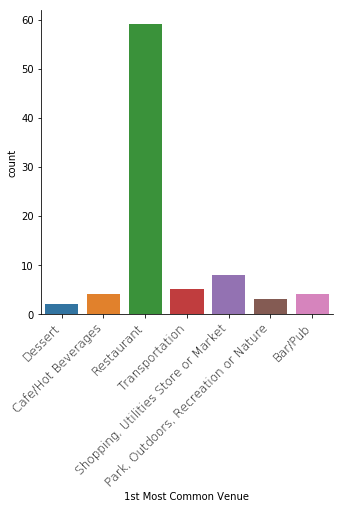

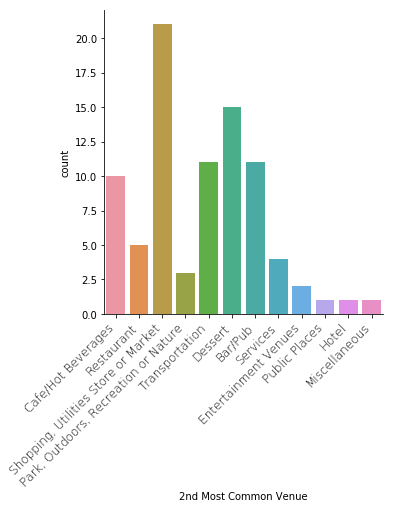

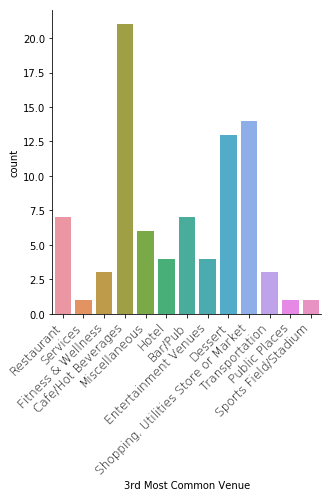

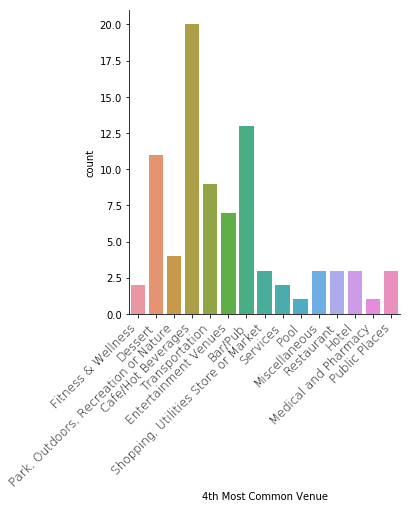

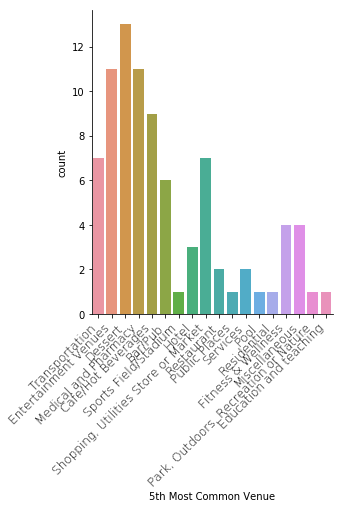

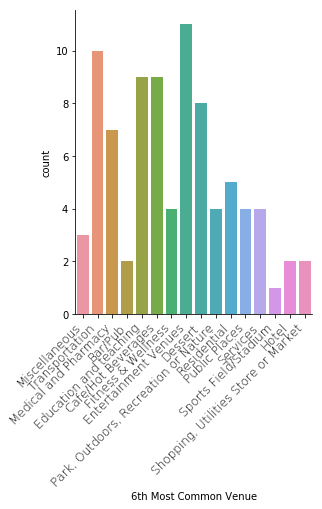

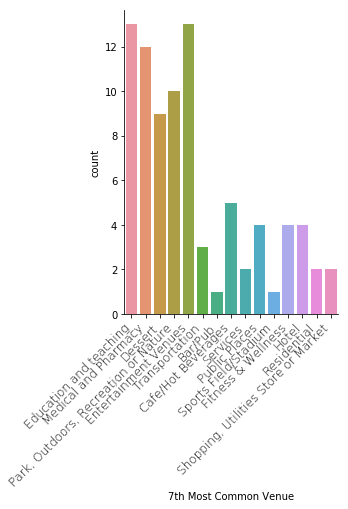

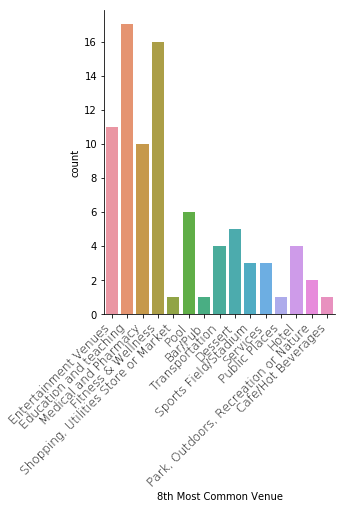

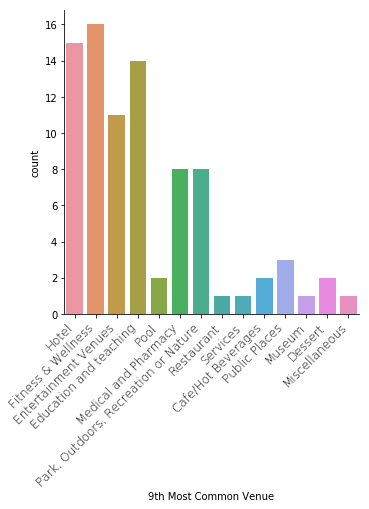

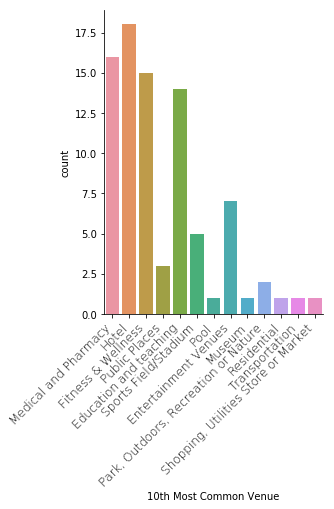

In [91]:
## Plotting the most common venue categories in each neighborhood
plt.figure(figsize=[20,10])
sns.catplot(x='1st Most Common Venue',kind='count',data=neighborhoods_venues_sorted1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='2nd Most Common Venue',kind='count',data=neighborhoods_venues_sorted1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='3rd Most Common Venue',kind='count',data=neighborhoods_venues_sorted1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='4th Most Common Venue',kind='count',data=neighborhoods_venues_sorted1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='5th Most Common Venue',kind='count',data=neighborhoods_venues_sorted1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='6th Most Common Venue',kind='count',data=neighborhoods_venues_sorted1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='7th Most Common Venue',kind='count',data=neighborhoods_venues_sorted1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='8th Most Common Venue',kind='count',data=neighborhoods_venues_sorted1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='9th Most Common Venue',kind='count',data=neighborhoods_venues_sorted1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='10th Most Common Venue',kind='count',data=neighborhoods_venues_sorted1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

In [92]:
# Label Emcoding newyork dataset for the purpose modelling
newyork_merged["1st Most Common Venue"] = newyork_merged["1st Most Common Venue"].map(le_name_mapping)
newyork_merged["2nd Most Common Venue"] = newyork_merged["2nd Most Common Venue"].map(le_name_mapping)
newyork_merged["3rd Most Common Venue"] = newyork_merged["3rd Most Common Venue"].map(le_name_mapping)
newyork_merged["4th Most Common Venue"] = newyork_merged["4th Most Common Venue"].map(le_name_mapping)
newyork_merged["5th Most Common Venue"] = newyork_merged["5th Most Common Venue"].map(le_name_mapping)
newyork_merged["6th Most Common Venue"] = newyork_merged["6th Most Common Venue"].map(le_name_mapping)
newyork_merged["7th Most Common Venue"] = newyork_merged["7th Most Common Venue"].map(le_name_mapping)
newyork_merged["8th Most Common Venue"] = newyork_merged["8th Most Common Venue"].map(le_name_mapping)
newyork_merged["9th Most Common Venue"] = newyork_merged["9th Most Common Venue"].map(le_name_mapping)
newyork_merged["10th Most Common Venue"] = newyork_merged["10th Most Common Venue"].map(le_name_mapping)

In [93]:
newyork_merged.head()

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               2   
1  Manhattan           Chinatown  40.715618 -73.994279               0   
2  Manhattan  Washington Heights  40.851903 -73.936900               2   
3  Manhattan              Inwood  40.867684 -73.921210               0   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               0   

   1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
0                     15                     17                      5   
1                     15                     17                      0   
2                     15                     17                      1   
3                     15                     17                      0   
4                     15                      0                      1   

   4th Most Common Venue  5th Most Common Venue  6th Most Common Venue  \
0                      1                      7                     18   
1                      2                      1                     16   
2                      0                      2                     16   
3                      4                      1                     11   
4                     17                      2                      3   

   7th Most Common Venue  8th Most Common Venue  9th Most Common Venue  \
0                     16                      2                     20   
1                      4                      6                     18   
2                     11                      5                     13   
3                      2                      7                      9   
4                      5                     16                     13   

   10th Most Common Venue  
0                       3  
1                      13  
2                      12  
3                       5  
4                      11

In [94]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [95]:
## Assigning independent and targetted variables
X = newyork_merged.iloc[:, 5:].values
y = newyork_merged.iloc[:, 4].values
print(X)

[[15 17  5  1  7 18 16  2 20  3]
 [15 17  0  2  1 16  4  6 18 13]
 [15 17  1  0  2 16 11  5 13 12]
 [15 17  0  4  1 11  2  7  9  5]
 [15  0  1 17  2  3  5 16 13 11]
 [15  1  0 11 17  5 20 16  4 13]
 [15  0 17  4 16  5  1 18 13  2]
 [15  2 17  0 16  4  7  1 13 11]
 [15 17  0  4  5  2  1 16  6 13]
 [15  0  1  5 17 16  2 11  7 18]
 [15 17  1  0  5  4  2 16  3 11]
 [15 11 17  1  5 20 18 16 14 13]
 [15  0  2 17  1  5 16 11  4  7]
 [15  4 17 13  5  1  0  2 11 16]
 [15  4  0  5  1 17  6 16  2 11]
 [15 17  4  1  6  2 16  5  0 13]
 [15  0  5  6  1 17  2  9 20 13]
 [15 17  4  1  0  2 16 11  7  5]
 [15  4  1 17  2  0 16 11  5  3]
 [15  0 17  2  1 11 16  4  7  3]
 [15 17  4  1  0  2 11  7 18  5]
 [15 11  0  1  4 16 18 17  5  2]
 [15 17  0  1  2 16  4  6 11  5]
 [15 17  2  1  0 16  4  5  6 11]
 [15  0 17  4 11  2  1 16 13 19]
 [15  1 17  0 11  2  5 16 14  7]
 [15 17  1 11 16  0  7 18  2  4]
 [15  0 17  4  1 11  2 16  6  7]
 [11 15 17  0 13  6 18  1  5  2]
 [15  1  0 17 11  5 13  6 16  2]
 [15  0  1

In [96]:
## Spliiting datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [97]:
## Scalling datasets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [103]:
## Importing important packages for the purpose of modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

k=1 31.67 (+/- 18.93)
k=2 27.50 (+/- 26.37)
k=3 40.83 (+/- 29.92)
k=4 28.33 (+/- 33.37)
k=5 31.67 (+/- 28.33)
k=6 32.50 (+/- 25.94)
k=7 29.17 (+/- 27.70)
k=8 31.67 (+/- 24.09)
k=9 35.00 (+/- 26.30)
k=10 21.67 (+/- 27.94)
k=11 28.33 (+/- 25.87)
k=12 25.00 (+/- 27.13)
k=13 25.00 (+/- 22.67)
k=14 18.33 (+/- 24.09)
k=15 21.67 (+/- 23.63)
k=16 28.33 (+/- 15.00)
k=17 28.33 (+/- 21.15)
k=18 28.33 (+/- 15.00)
k=19 25.83 (+/- 13.15)
k=20 29.17 (+/- 17.97)
k=21 31.67 (+/- 18.93)
k=22 35.00 (+/- 21.67)
k=23 38.33 (+/- 23.63)
k=24 38.33 (+/- 23.63)
k=25 38.33 (+/- 23.63)
The optimal number of neighbors is 3 with 40.8%


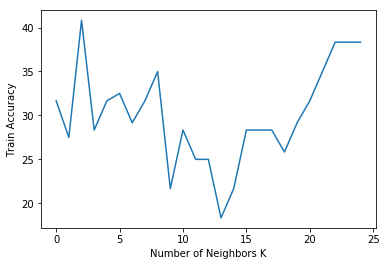

In [104]:
### To find optimum k value for KNN algorithm
neighbors = np.arange(0,25)

Kcv_scores = []

for k in neighbors:
    k_value = k+1
    knnt = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfoldN = KFold(n_splits=10, random_state=123)
    Kscores = cross_val_score(knnt, X_train, y_train, cv=kfoldN, scoring='accuracy')
    Kcv_scores.append(Kscores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, Kscores.mean()*100, Kscores.std()*100))

optimal_k = neighbors[Kcv_scores.index(max(Kcv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k+1, Kcv_scores[optimal_k]))

plt.plot(neighbors, Kcv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [105]:
## fiting the model and finding accuracy
knn=KNeighborsClassifier(n_neighbors = optimal_k+1, weights='uniform', p=2, metric='euclidean')
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)

[[1 0 0 0 0]
 [2 0 0 0 0]
 [0 0 3 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]]
50.0


#### Although the accuracy of the model is not good, we can use this for the purpose of the project

In [106]:
neighborhoods_venues_sorted1["1st Most Common Venue"] = neighborhoods_venues_sorted1["1st Most Common Venue"].map(le_name_mapping)
neighborhoods_venues_sorted1["2nd Most Common Venue"] = neighborhoods_venues_sorted1["2nd Most Common Venue"].map(le_name_mapping)
neighborhoods_venues_sorted1["3rd Most Common Venue"] = neighborhoods_venues_sorted1["3rd Most Common Venue"].map(le_name_mapping)
neighborhoods_venues_sorted1["4th Most Common Venue"] = neighborhoods_venues_sorted1["4th Most Common Venue"].map(le_name_mapping)
neighborhoods_venues_sorted1["5th Most Common Venue"] = neighborhoods_venues_sorted1["5th Most Common Venue"].map(le_name_mapping)
neighborhoods_venues_sorted1["6th Most Common Venue"] = neighborhoods_venues_sorted1["6th Most Common Venue"].map(le_name_mapping)
neighborhoods_venues_sorted1["7th Most Common Venue"] = neighborhoods_venues_sorted1["7th Most Common Venue"].map(le_name_mapping)
neighborhoods_venues_sorted1["8th Most Common Venue"] = neighborhoods_venues_sorted1["8th Most Common Venue"].map(le_name_mapping)
neighborhoods_venues_sorted1["9th Most Common Venue"] = neighborhoods_venues_sorted1["9th Most Common Venue"].map(le_name_mapping)
neighborhoods_venues_sorted1["10th Most Common Venue"] = neighborhoods_venues_sorted1["10th Most Common Venue"].map(le_name_mapping)

In [107]:
neighborhoods_venues_sorted1.head()

Neighborhood  1st Most Common Venue  2nd Most Common Venue  \
0        Agripada                      2                      1   
1  Altamount Road                      1                     15   
2          Amboli                     15                      1   
3     Amrut Nagar                     15                     17   
4          Asalfa                     20                     11   

   3rd Most Common Venue  4th Most Common Venue  5th Most Common Venue  \
0                     15                      5                     20   
1                     16                      2                      4   
2                      5                     11                     20   
3                      1                      2                      4   
4                      8                      1                      2   

   6th Most Common Venue  7th Most Common Venue  8th Most Common Venue  \
0                      8                      3                      4   
1                     20                      7                      3   
2                      7                      2                      3   
3                      0                     11                      7   
4                      3                      4                      5   

   9th Most Common Venue  10th Most Common Venue  
0                      6                       7  
1                      5                       6  
2                      4                       6  
3                      3                       5  
4                      6                       7

In [108]:
Y=knn.predict(neighborhoods_venues_sorted1.iloc[:, 1:].values)
Y

array([0, 2, 3, 2, 0, 4, 2, 2, 2, 2, 2, 0, 3, 0, 4, 0, 2, 2, 0, 4, 4, 3,
       0, 2, 3, 2, 4, 4, 2, 4, 0, 4, 2, 3, 2, 2, 3, 0, 0, 0, 0, 3, 0, 2,
       2, 2, 3, 1, 0, 1, 4, 3, 2, 0, 0, 2, 2, 2, 2, 3, 4, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 3, 4, 4, 2, 3, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0],
      dtype=int32)

In [109]:
neighborhoods_venues_sorted1.insert(1, "Label", value=Y, allow_duplicates = False)
neighborhoods_venues_sorted1.head()

Neighborhood  Label  1st Most Common Venue  2nd Most Common Venue  \
0        Agripada      0                      2                      1   
1  Altamount Road      2                      1                     15   
2          Amboli      3                     15                      1   
3     Amrut Nagar      2                     15                     17   
4          Asalfa      0                     20                     11   

   3rd Most Common Venue  4th Most Common Venue  5th Most Common Venue  \
0                     15                      5                     20   
1                     16                      2                      4   
2                      5                     11                     20   
3                      1                      2                      4   
4                      8                      1                      2   

   6th Most Common Venue  7th Most Common Venue  8th Most Common Venue  \
0                      8                      3                      4   
1                     20                      7                      3   
2                      7                      2                      3   
3                      0                     11                      7   
4                      3                      4                      5   

   9th Most Common Venue  10th Most Common Venue  
0                      6                       7  
1                      5                       6  
2                      4                       6  
3                      3                       5  
4                      6                       7

In [110]:
neighborhoods_venues_sorted1['Label'].value_counts()

2    37
0    22
4    12
3    12
1     2
Name: Label, dtype: int64

In [111]:
neighborhoods_venues_sorted1["1st Most Common Venue"] = le.inverse_transform(neighborhoods_venues_sorted1["1st Most Common Venue"])
neighborhoods_venues_sorted1["2nd Most Common Venue"] = le.inverse_transform(neighborhoods_venues_sorted1["2nd Most Common Venue"])
neighborhoods_venues_sorted1["3rd Most Common Venue"] = le.inverse_transform(neighborhoods_venues_sorted1["3rd Most Common Venue"])
neighborhoods_venues_sorted1["4th Most Common Venue"] = le.inverse_transform(neighborhoods_venues_sorted1["4th Most Common Venue"])
neighborhoods_venues_sorted1["5th Most Common Venue"] = le.inverse_transform(neighborhoods_venues_sorted1["5th Most Common Venue"])
neighborhoods_venues_sorted1["6th Most Common Venue"] = le.inverse_transform(neighborhoods_venues_sorted1["6th Most Common Venue"])
neighborhoods_venues_sorted1["7th Most Common Venue"] = le.inverse_transform(neighborhoods_venues_sorted1["7th Most Common Venue"])
neighborhoods_venues_sorted1["8th Most Common Venue"] = le.inverse_transform(neighborhoods_venues_sorted1["8th Most Common Venue"])
neighborhoods_venues_sorted1["9th Most Common Venue"] = le.inverse_transform(neighborhoods_venues_sorted1["9th Most Common Venue"])
neighborhoods_venues_sorted1["10th Most Common Venue"] = le.inverse_transform(neighborhoods_venues_sorted1["10th Most Common Venue"])
neighborhoods_venues_sorted1.head()

Neighborhood  Label 1st Most Common Venue  \
0        Agripada      0               Dessert   
1  Altamount Road      2    Cafe/Hot Beverages   
2          Amboli      3            Restaurant   
3     Amrut Nagar      2            Restaurant   
4          Asalfa      0        Transportation   

                  2nd Most Common Venue 3rd Most Common Venue  \
0                    Cafe/Hot Beverages            Restaurant   
1                            Restaurant              Services   
2                    Cafe/Hot Beverages    Fitness & Wellness   
3   Shopping, Utilities Store or Market    Cafe/Hot Beverages   
4  Park, Outdoors, Recreation or Nature         Miscellaneous   

                  4th Most Common Venue 5th Most Common Venue  \
0                    Fitness & Wellness        Transportation   
1                               Dessert  Entertainment Venues   
2  Park, Outdoors, Recreation or Nature        Transportation   
3                               Dessert  Entertainment Venues   
4                    Cafe/Hot Beverages               Dessert   

    6th Most Common Venue                 7th Most Common Venue  \
0           Miscellaneous                Education and teaching   
1          Transportation                  Medical and Pharmacy   
2    Medical and Pharmacy                               Dessert   
3                 Bar/Pub  Park, Outdoors, Recreation or Nature   
4  Education and teaching                  Entertainment Venues   

    8th Most Common Venue   9th Most Common Venue 10th Most Common Venue  
0    Entertainment Venues                   Hotel   Medical and Pharmacy  
1  Education and teaching      Fitness & Wellness                  Hotel  
2  Education and teaching    Entertainment Venues                  Hotel  
3    Medical and Pharmacy  Education and teaching     Fitness & Wellness  
4      Fitness & Wellness                   Hotel   Medical and Pharmacy

In [112]:
mumbai_merged = mumbai

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted1.set_index('Neighborhood'), on='Neighborhood')

mumbai_merged.head() # check the last columns!

Neighborhood                    Borough   Latitude  Longitude  Label  \
0  Aarey Milk Colony   Goregaon,Western Suburbs  19.148493  72.881756    NaN   
1           Agripada               South Mumbai  18.977700  72.827300    0.0   
2     Altamount Road               South Mumbai  18.968100  72.809500    2.0   
3             Amboli    Andheri,Western Suburbs  19.129300  72.843400    3.0   
4        Amrut Nagar  Ghatkopar,Eastern Suburbs  19.102077  72.912835    2.0   

  1st Most Common Venue                2nd Most Common Venue  \
0                   NaN                                  NaN   
1               Dessert                   Cafe/Hot Beverages   
2    Cafe/Hot Beverages                           Restaurant   
3            Restaurant                   Cafe/Hot Beverages   
4            Restaurant  Shopping, Utilities Store or Market   

  3rd Most Common Venue                 4th Most Common Venue  \
0                   NaN                                   NaN   
1            Restaurant                    Fitness & Wellness   
2              Services                               Dessert   
3    Fitness & Wellness  Park, Outdoors, Recreation or Nature   
4    Cafe/Hot Beverages                               Dessert   

  5th Most Common Venue 6th Most Common Venue  \
0                   NaN                   NaN   
1        Transportation         Miscellaneous   
2  Entertainment Venues        Transportation   
3        Transportation  Medical and Pharmacy   
4  Entertainment Venues               Bar/Pub   

                  7th Most Common Venue   8th Most Common Venue  \
0                                   NaN                     NaN   
1                Education and teaching    Entertainment Venues   
2                  Medical and Pharmacy  Education and teaching   
3                               Dessert  Education and teaching   
4  Park, Outdoors, Recreation or Nature    Medical and Pharmacy   

    9th Most Common Venue 10th Most Common Venue  
0                     NaN                    NaN  
1                   Hotel   Medical and Pharmacy  
2      Fitness & Wellness                  Hotel  
3    Entertainment Venues                  Hotel  
4  Education and teaching     Fitness & Wellness

In [113]:
mumbai_merged_copy=mumbai_merged.dropna(axis=0)

In [114]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged_copy['Latitude'], mumbai_merged_copy['Longitude'], mumbai_merged_copy['Neighborhood'], mumbai_merged_copy['Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [115]:
# Cluster 1
mumbai_merged_copy_1=mumbai_merged_copy.loc[mumbai_merged_copy['Label'] == 0, mumbai_merged_copy.columns[[1] + list(range(5, mumbai_merged_copy.shape[1]))]]
mumbai_merged_copy_1

Borough                1st Most Common Venue  \
1                      South Mumbai                              Dessert   
5         Ghatkopar,Eastern Suburbs                       Transportation   
12                     South Mumbai                           Restaurant   
14                     South Mumbai                           Restaurant   
16                  Western Suburbs                           Restaurant   
19                  Harbour Suburbs                           Restaurant   
23                     South Mumbai                       Transportation   
31          Govandi,Harbour Suburbs  Shopping, Utilities Store or Market   
38  Borivali (West),Western Suburbs                           Restaurant   
39              tardeo,South Mumbai                              Bar/Pub   
41            Powai,Eastern Suburbs                           Restaurant   
42  Borivali (West),Western Suburbs                           Restaurant   
44       Vile Parle,western Suburbs                           Restaurant   
50                     South Mumbai                           Restaurant   
56   Kandivali west,Western Suburbs                           Restaurant   
57                     South Mumbai                           Restaurant   
65   Mira-Bhayandar,Western Suburbs                           Restaurant   
69            Vasai,western Suburbs                           Restaurant   
70                     South Mumbai                           Restaurant   
83   Kandivali east,Western Suburbs                           Restaurant   
86          Andheri,Western Suburbs                              Bar/Pub   
92                     South Mumbai                           Restaurant   

                   2nd Most Common Venue                3rd Most Common Venue  \
1                     Cafe/Hot Beverages                           Restaurant   
5   Park, Outdoors, Recreation or Nature                        Miscellaneous   
12                    Cafe/Hot Beverages                              Dessert   
14                               Dessert  Shopping, Utilities Store or Market   
16                               Bar/Pub                   Cafe/Hot Beverages   
19                               Bar/Pub  Shopping, Utilities Store or Market   
23                         Public Places                              Dessert   
31                               Bar/Pub                           Restaurant   
38                                 Hotel                        Public Places   
39                    Cafe/Hot Beverages                           Restaurant   
41                               Dessert  Shopping, Utilities Store or Market   
42                               Bar/Pub                              Dessert   
44                               Dessert  Shopping, Utilities Store or Market   
50                               Dessert                   Cafe/Hot Beverages   
56                               Dessert  Shopping, Utilities Store or Market   
57                    Cafe/Hot Beverages                              Bar/Pub   
65                    Cafe/Hot Beverages                              Dessert   
69                        Transportation                              Bar/Pub   
70                  Entertainment Venues                   Cafe/Hot Beverages   
83                               Dessert  Shopping, Utilities Store or Market   
86                         Miscellaneous                   Cafe/Hot Beverages   
92                               Dessert  Shopping, Utilities Store or Market   

                   4th Most Common Venue                5th Most Common Venue  \
1                     Fitness & Wellness                       Transportation   
5                     Cafe/Hot Beverages                              Dessert   
12   Shopping, Utilities Store or Market                              Bar/Pub   
14                              Services                   Cafe/Hot Beverages   
16        

In [116]:
# Cluster 2
mumbai_merged_copy_2=mumbai_merged_copy.loc[mumbai_merged_copy['Label'] == 1, mumbai_merged_copy.columns[[1] + list(range(5, mumbai_merged_copy.shape[1]))]]
mumbai_merged_copy_2

Borough 1st Most Common Venue 2nd Most Common Venue  \
49       Eastern Suburbs               Dessert            Restaurant   
51  khar,western Suburbs               Bar/Pub            Restaurant   

   3rd Most Common Venue                4th Most Common Venue  \
49  Entertainment Venues                       Transportation   
51  Entertainment Venues  Shopping, Utilities Store or Market   

   5th Most Common Venue 6th Most Common Venue   7th Most Common Venue  \
49         Miscellaneous    Cafe/Hot Beverages  Education and teaching   
51               Dessert                 Hotel      Cafe/Hot Beverages   

   8th Most Common Venue   9th Most Common Venue 10th Most Common Venue  
49    Fitness & Wellness                   Hotel   Medical and Pharmacy  
51  Medical and Pharmacy  Education and teaching     Fitness & Wellness

In [117]:
# Cluster 3
mumbai_merged_copy_3=mumbai_merged_copy.loc[mumbai_merged_copy['Label'] == 2, mumbai_merged_copy.columns[[1] + list(range(5, mumbai_merged_copy.shape[1]))]]
mumbai_merged_copy_3

Borough                 1st Most Common Venue  \
2                     South Mumbai                    Cafe/Hot Beverages   
4        Ghatkopar,Eastern Suburbs                            Restaurant   
7           Bandra,Western Suburbs                            Restaurant   
8         Goregaon,Western Suburbs   Shopping, Utilities Store or Market   
9                  Eastern Suburbs                            Restaurant   
10  Mira-Bhayandar,Western Suburbs   Shopping, Utilities Store or Market   
11                    South Mumbai                            Restaurant   
17           Powai,Eastern Suburbs   Shopping, Utilities Store or Market   
18  Kandivali west,Western Suburbs                            Restaurant   
24                    South Mumbai  Park, Outdoors, Recreation or Nature   
26                    South Mumbai                            Restaurant   
29                 Western Suburbs                            Restaurant   
33                    South Mumbai                            Restaurant   
35                    South Mumbai  Park, Outdoors, Recreation or Nature   
36          Kalbadevi,South Mumbai                            Restaurant   
45                 Western Suburbs                            Restaurant   
46                 Western Suburbs                            Restaurant   
47                    South Mumbai                            Restaurant   
54                    South Mumbai                            Restaurant   
59                    South Mumbai                            Restaurant   
60                 Harbour Suburbs                        Transportation   
61                    South Mumbai                            Restaurant   
62                    South Mumbai                            Restaurant   
66                    South Mumbai                            Restaurant   
67          Mulund,Eastern Suburbs                            Restaurant   
68           Vasai,western Suburbs                        Transportation   
71             Colaba,South Mumbai   Shopping, Utilities Store or Market   
73          Bandra,Western Suburbs                            Restaurant   
74            khar,western Suburbs                            Restaurant   
78                    South Mumbai                            Restaurant   
81                    South Mumbai                            Restaurant   
82           Malad,western Suburbs                            Restaurant   
84                          Mumbai                            Restaurant   
85  Mira-Bhayandar,Western Suburbs  Park, Outdoors, Recreation or Nature   
87                 Eastern Suburbs                        Transportation   
89                 western Suburbs                            Restaurant   
91                    South Mumbai   Shopping, Utilities Store or Market   

                   2nd Most Common Venue 3rd Most Common Venue  \
2                             Restaurant              Services   
4    Shopping, Utilities Store or Market    Cafe/Hot Beverages   
7   Park, Outdoors, Recreation or Nature               Bar/Pub   
8                         Transportation         Miscellaneous   
9    Shopping, Utilities Store or Market  Entertainment Venues   
10                        Transportation         Miscellaneous   
11   Shopping, Utilities Store or Market               Dessert   
17                              Services               Dessert   
18   Shopping, Utilities Store or Market    Cafe/Hot Beverages   
24                        Transportation         Miscellaneous   
26   Shopping, Utilities Store or Market    Cafe/Hot Beverages   
29                        Transportation    Cafe/Hot Beverages   
33   Shopping, Utilities Store or Market    Cafe/Hot Beverages   
35                        Transportation            Restaurant   
36   Shopping, Utilities Store or Market               Dessert   
45                        Transportation               Dessert   
46              

In [118]:
# Cluster 4
mumbai_merged_copy_4=mumbai_merged_copy.loc[mumbai_merged_copy['Label'] == 3, mumbai_merged_copy.columns[[1] + list(range(5, mumbai_merged_copy.shape[1]))]]
mumbai_merged_copy_4

Borough                1st Most Common Venue  \
3      Andheri,Western Suburbs                           Restaurant   
13     Antop Hill,South Mumbai                           Restaurant   
22                South Mumbai                           Restaurant   
25                South Mumbai                           Restaurant   
34       Malad,western Suburbs                           Restaurant   
37     Andheri,Western Suburbs  Shopping, Utilities Store or Market   
43       Powai,Eastern Suburbs                   Cafe/Hot Beverages   
48  Sanctacruz,western Suburbs                           Restaurant   
53     Andheri,Western Suburbs                              Bar/Pub   
63     Andheri,Western Suburbs                           Restaurant   
75   Ghatkopar,Eastern Suburbs                           Restaurant   
80     Andheri,Western Suburbs                           Restaurant   

                  2nd Most Common Venue                3rd Most Common Venue  \
3                    Cafe/Hot Beverages                   Fitness & Wellness   
13                   Cafe/Hot Beverages                              Dessert   
22                 Entertainment Venues                                Hotel   
25                   Cafe/Hot Beverages                              Dessert   
34                              Dessert                   Fitness & Wellness   
37                           Restaurant                              Bar/Pub   
43                             Services                           Restaurant   
48  Shopping, Utilities Store or Market                 Entertainment Venues   
53  Shopping, Utilities Store or Market                   Cafe/Hot Beverages   
63                              Dessert  Shopping, Utilities Store or Market   
75                              Dessert                   Cafe/Hot Beverages   
80                              Bar/Pub                   Cafe/Hot Beverages   

                   4th Most Common Venue  \
3   Park, Outdoors, Recreation or Nature   
13  Park, Outdoors, Recreation or Nature   
22                               Bar/Pub   
25                               Bar/Pub   
34                               Bar/Pub   
37                  Medical and Pharmacy   
43                         Public Places   
48                        Transportation   
53                            Restaurant   
63                    Cafe/Hot Beverages   
75                  Entertainment Venues   
80                               Dessert   

                   5th Most Common Venue 6th Most Common Venue  \
3                         Transportation  Medical and Pharmacy   
13                  Sports Field/Stadium        Transportation   
22   Shopping, Utilities Store or Market    Cafe/Hot Beverages   
25   Shopping, Utilities Store or Market         Public Places   
34   Shopping, Utilities Store or Market              Services   
37                           Residential               Dessert   
43                        Transportation  Medical and Pharmacy   
48                    Fitness & Wellness               Dessert   
53                  Medical and Pharmacy  Entertainment Venues   
63  Park, Outdoors, Recreation or Nature                 Hotel   
75                        Transportation         Miscellaneous   
80   Shopping, Utilities Store or Market         Public Places   

                   7th Most Common Venue   8th Most Common Venue  \
3                                Dessert  Education and teaching   
13                  Medical and Pharmacy  Education and teaching   
22  Park, Outdoors, Recreation or Nature                 Dessert   
25  Park, Outdoors, Recreation or Nature    Entertainment Venues   
34                    Cafe/Hot Beverages    Medical and Pharmacy   
37                  Entertainment Venues      Fitness & Wellness   
43                               Dessert  Education and teaching   
48                                 Hotel    Medical and Pharmacy   
53            

In [119]:
# Cluster 5
mumbai_merged_copy_5=mumbai_merged_copy.loc[mumbai_merged_copy['Label'] == 4, mumbai_merged_copy.columns[[1] + list(range(5, mumbai_merged_copy.shape[1]))]]
mumbai_merged_copy_5

Borough                1st Most Common Venue  \
6                Fort,South Mumbai  Shopping, Utilities Store or Market   
15                    South Mumbai                           Restaurant   
20          Kalbadevi,South Mumbai                           Restaurant   
21        Kamathipura,South Mumbai                           Restaurant   
27         Andheri,Western Suburbs                           Restaurant   
28            Byculla,South Mumbai                           Restaurant   
30                    South Mumbai                           Restaurant   
32                          Mumbai                   Cafe/Hot Beverages   
52          Bandra,Western Suburbs                           Restaurant   
64                    South Mumbai                           Restaurant   
76                    South Mumbai                           Restaurant   
77  Kandivali west,Western Suburbs                   Cafe/Hot Beverages   

                   2nd Most Common Venue                3rd Most Common Venue  \
6   Park, Outdoors, Recreation or Nature                                Hotel   
15   Shopping, Utilities Store or Market                   Cafe/Hot Beverages   
20   Shopping, Utilities Store or Market                       Transportation   
21                               Dessert  Shopping, Utilities Store or Market   
27                               Bar/Pub                   Fitness & Wellness   
28                               Dessert                       Transportation   
30   Shopping, Utilities Store or Market                              Bar/Pub   
32                               Bar/Pub  Shopping, Utilities Store or Market   
52                               Dessert  Shopping, Utilities Store or Market   
64                    Cafe/Hot Beverages  Shopping, Utilities Store or Market   
76                               Bar/Pub  Shopping, Utilities Store or Market   
77                               Bar/Pub  Shopping, Utilities Store or Market   

   4th Most Common Venue 5th Most Common Venue   6th Most Common Venue  \
6         Transportation  Medical and Pharmacy      Cafe/Hot Beverages   
15        Transportation  Entertainment Venues                 Dessert   
20    Cafe/Hot Beverages  Medical and Pharmacy                 Dessert   
21        Transportation  Medical and Pharmacy      Cafe/Hot Beverages   
27         Miscellaneous    Cafe/Hot Beverages                 Dessert   
28         Miscellaneous    Cafe/Hot Beverages  Education and teaching   
30    Cafe/Hot Beverages               Dessert    Entertainment Venues   
32            Restaurant  Medical and Pharmacy                 Dessert   
52               Bar/Pub    Cafe/Hot Beverages    Entertainment Venues   
64               Bar/Pub  Entertainment Venues           Public Places   
76         Public Places    Fitness & Wellness    Medical and Pharmacy   
77            Restaurant  Entertainment Venues    Medical and Pharmacy   

     7th Most Common Venue                 8th Most Common Venue  \
6                  Dessert                Education and teaching   
15                 Bar/Pub                                  Pool   
20  Education and teaching                  Entertainment Venues   
21  Education and teaching                  Entertainment Venues   
27  Education and teaching                  Entertainment Venues   
28    Entertainment Venues                    Fitness & Wellness   
30    Sports Field/Stadium                  Medical and Pharmacy   
32  Education and teaching                  Entertainment Venues   
52  Education and teaching  Park, Outdoors, Recreation or Nature   
64                   Hotel                  Medical and Pharmacy   
76      Cafe/Hot Beverages                               Dessert   
77                 Dessert                Education and teaching   

                   9th Most Common Venue  10th Most Common Venue  
6                   Entertainment Venues      Fitness & Wellness  
15  Park, Outdo

<Figure size 1440x720 with 0 Axes>

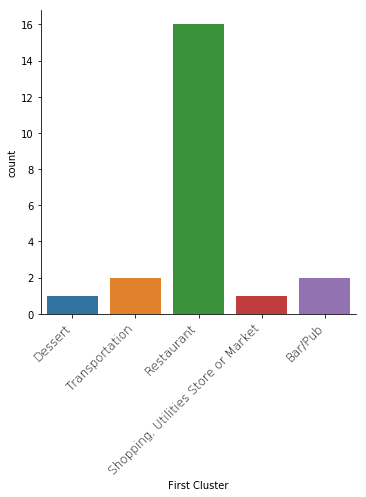

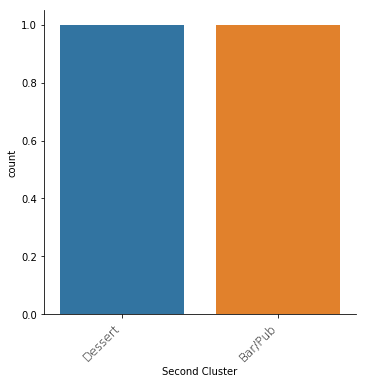

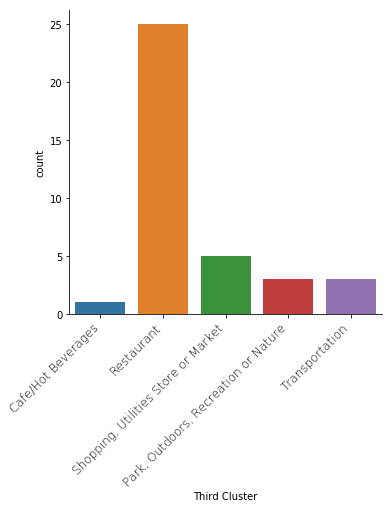

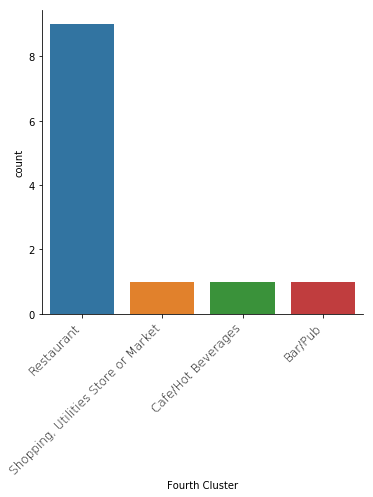

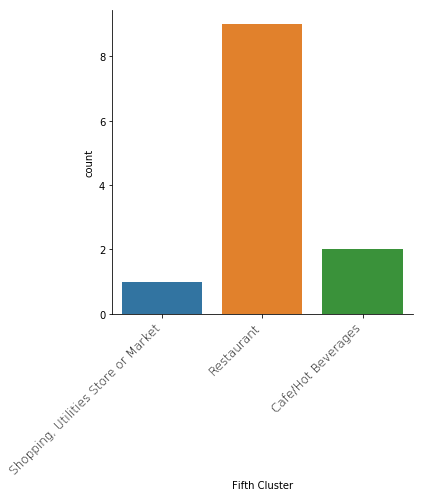

In [120]:
## Analysing 1st Most Common Venue in all 5 clusters
plt.figure(figsize=[20,10])
sns.catplot(x='1st Most Common Venue',kind='count',data=mumbai_merged_copy_1)
plt.xlabel("First Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='1st Most Common Venue',kind='count',data=mumbai_merged_copy_2)
plt.xlabel("Second Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='1st Most Common Venue',kind='count',data=mumbai_merged_copy_3)
plt.xlabel("Third Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='1st Most Common Venue',kind='count',data=mumbai_merged_copy_4)
plt.xlabel("Fourth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='1st Most Common Venue',kind='count',data=mumbai_merged_copy_5)
plt.xlabel("Fifth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

<Figure size 1440x720 with 0 Axes>

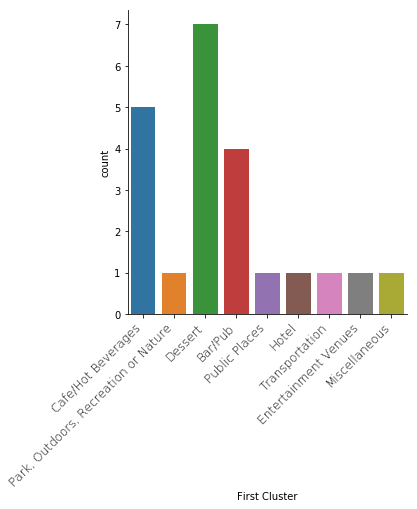

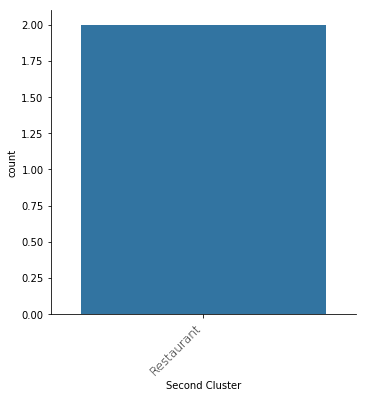

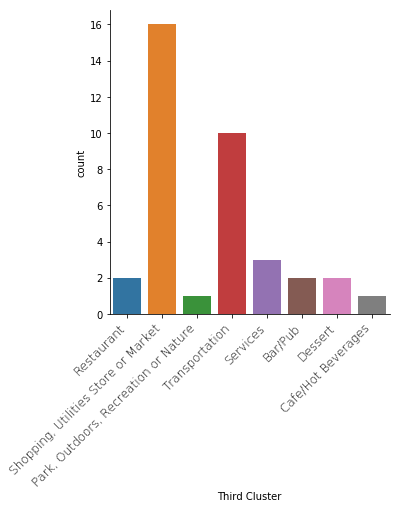

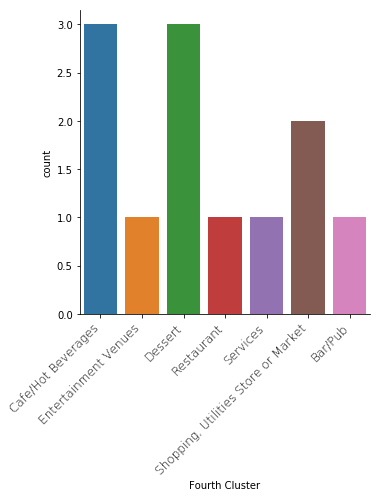

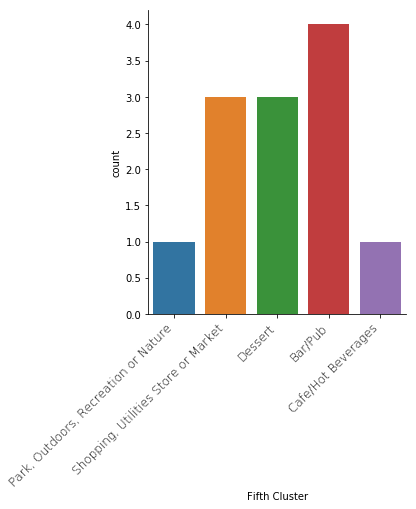

In [121]:
## Analysing the 2nd most common venue for all 5 clusters 
plt.figure(figsize=[20,10])
sns.catplot(x='2nd Most Common Venue',kind='count',data=mumbai_merged_copy_1)
plt.xlabel("First Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='2nd Most Common Venue',kind='count',data=mumbai_merged_copy_2)
plt.xlabel("Second Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='2nd Most Common Venue',kind='count',data=mumbai_merged_copy_3)
plt.xlabel("Third Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='2nd Most Common Venue',kind='count',data=mumbai_merged_copy_4)
plt.xlabel("Fourth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='2nd Most Common Venue',kind='count',data=mumbai_merged_copy_5)
plt.xlabel("Fifth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

<Figure size 1440x720 with 0 Axes>

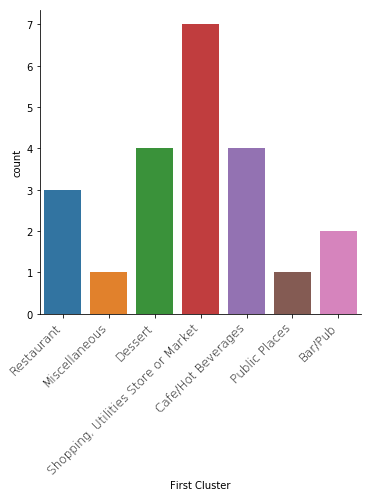

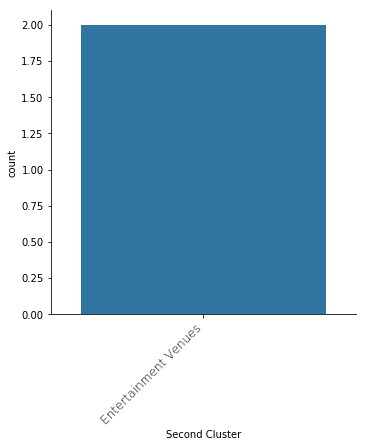

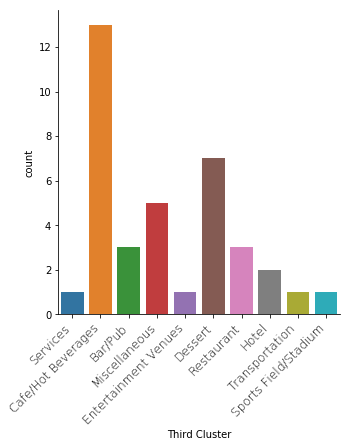

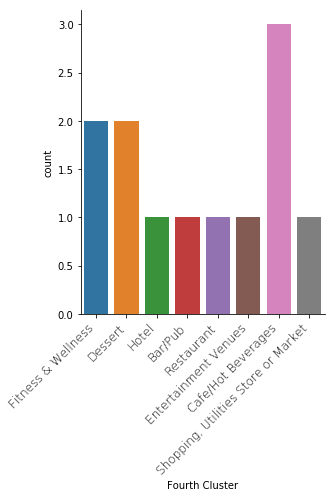

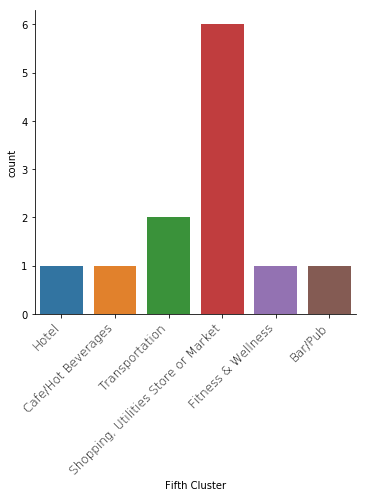

In [122]:
## Analysing the 3rd most common venue for all 5 clusters 
plt.figure(figsize=[20,10])
sns.catplot(x='3rd Most Common Venue',kind='count',data=mumbai_merged_copy_1)
plt.xlabel("First Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='3rd Most Common Venue',kind='count',data=mumbai_merged_copy_2)
plt.xlabel("Second Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='3rd Most Common Venue',kind='count',data=mumbai_merged_copy_3)
plt.xlabel("Third Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='3rd Most Common Venue',kind='count',data=mumbai_merged_copy_4)
plt.xlabel("Fourth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

sns.catplot(x='3rd Most Common Venue',kind='count',data=mumbai_merged_copy_5)
plt.xlabel("Fifth Cluster")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

Analysing the 4th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

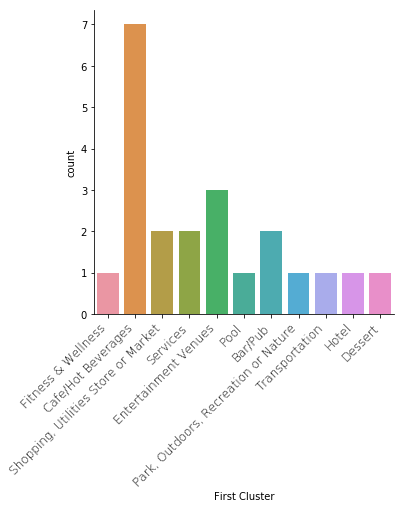

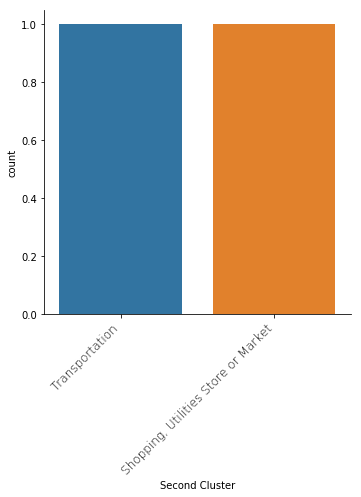

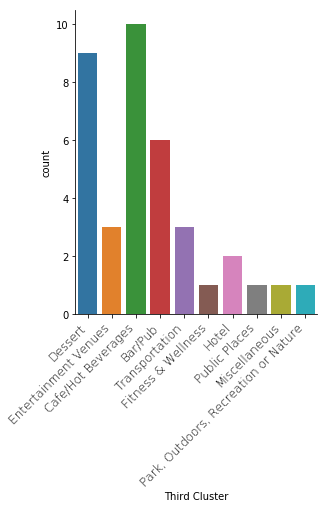

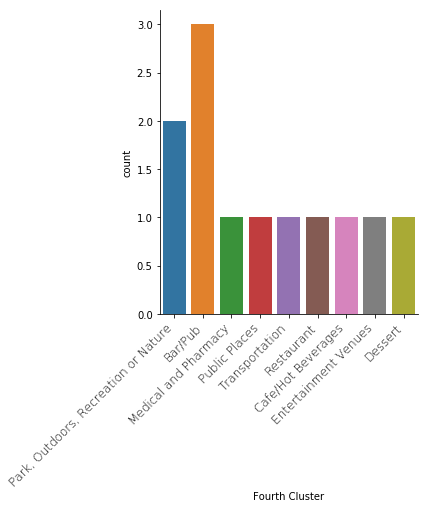

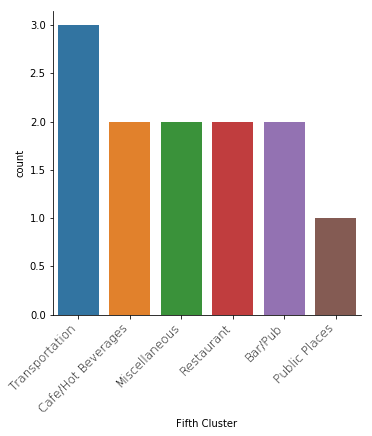

Analysing the 5th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

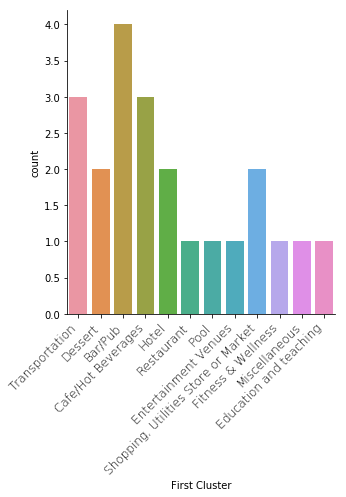

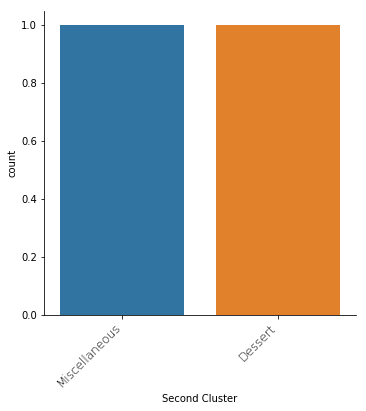

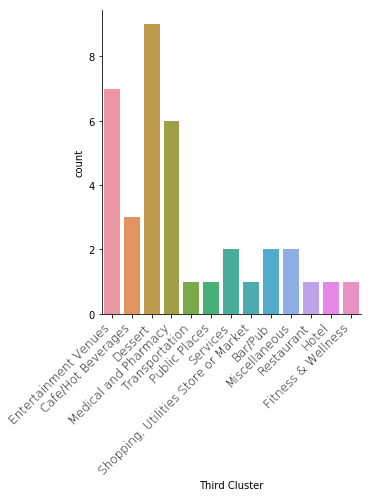

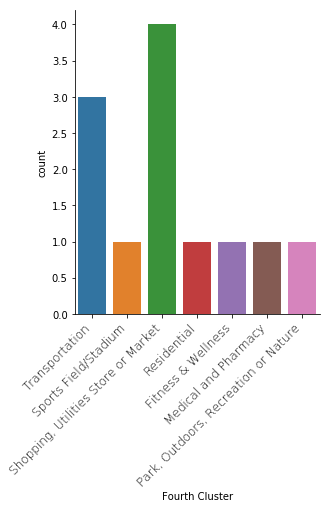

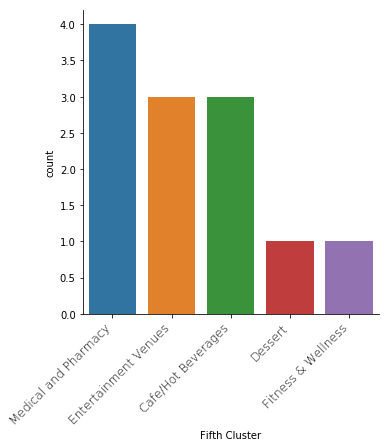

Analysing the 6th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

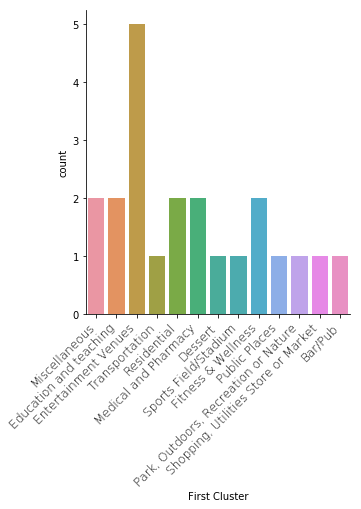

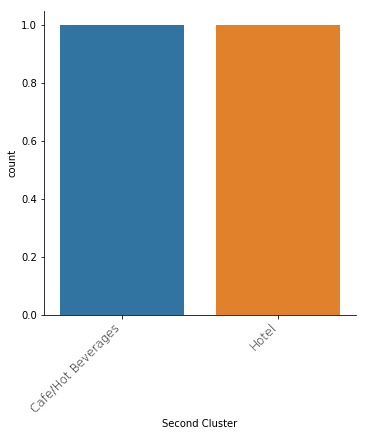

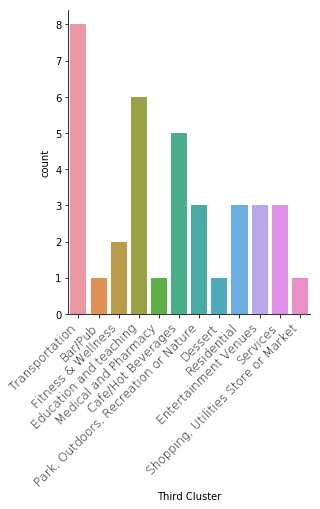

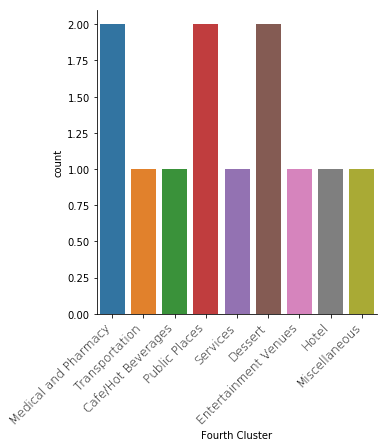

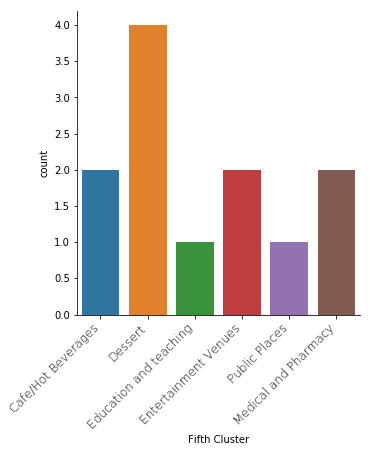

Analysing the 7th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

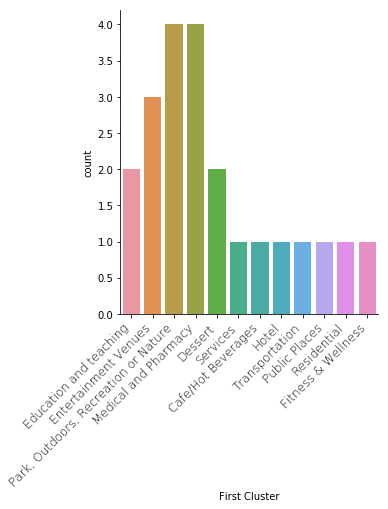

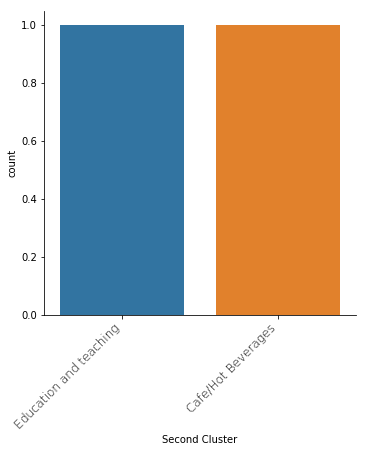

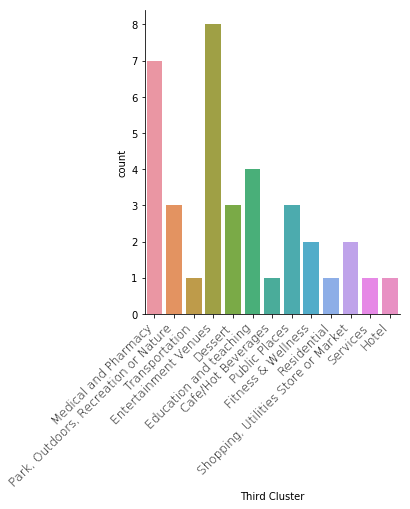

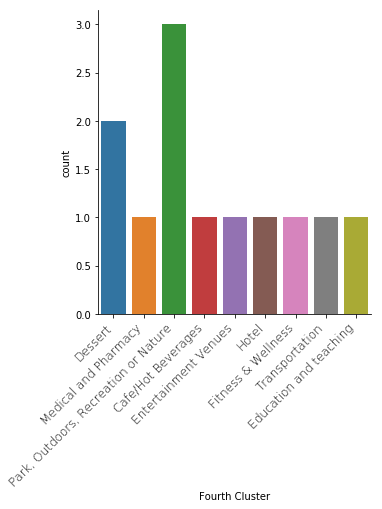

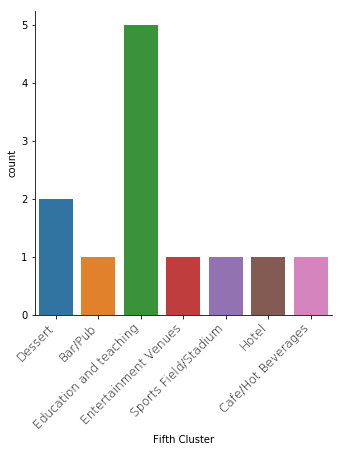

Analysing the 8th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

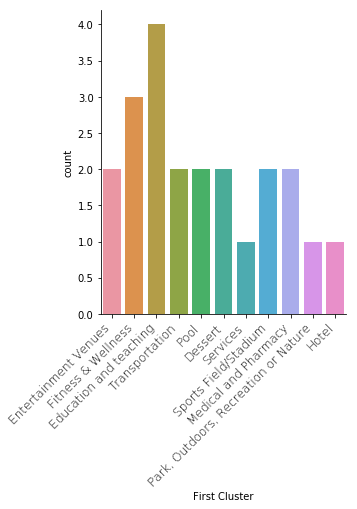

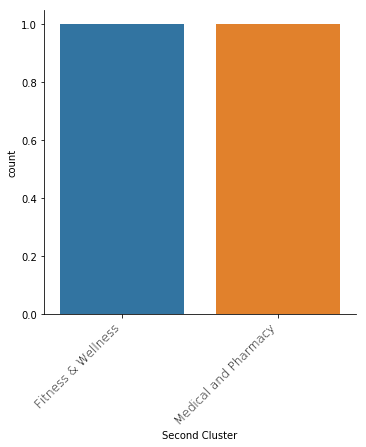

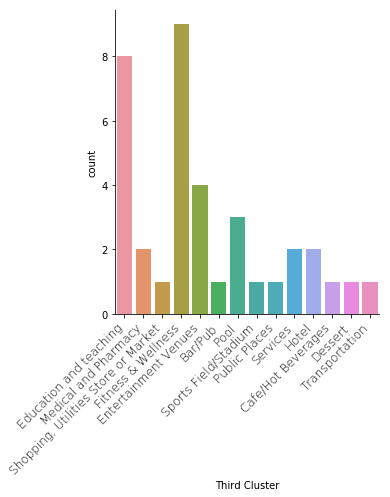

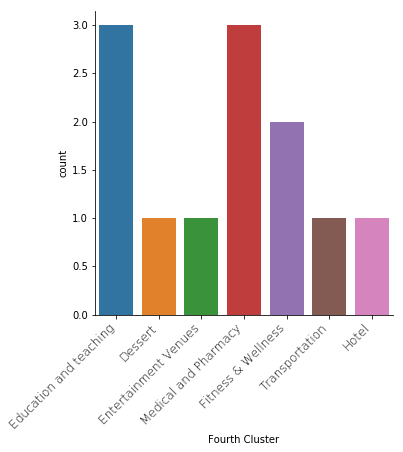

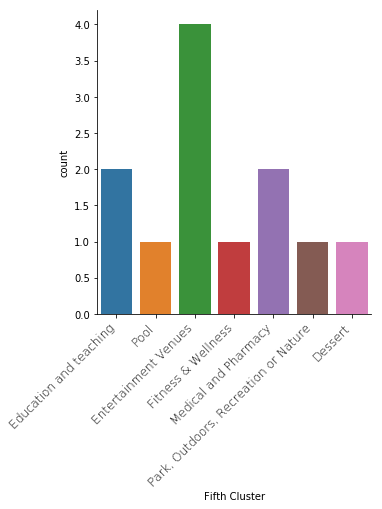

Analysing the 9th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

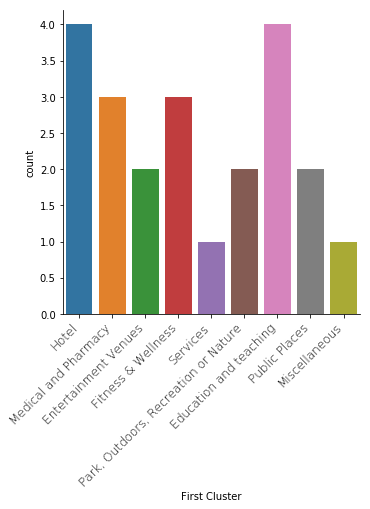

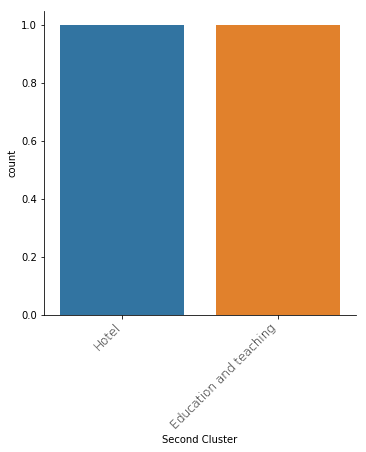

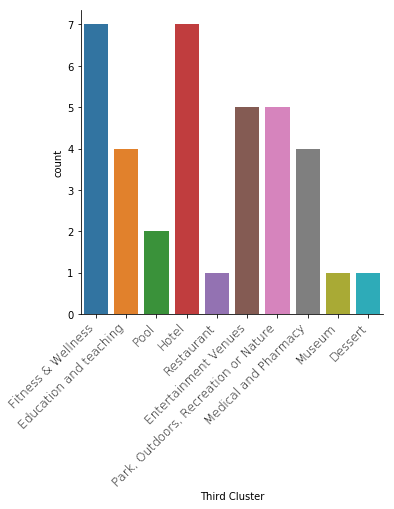

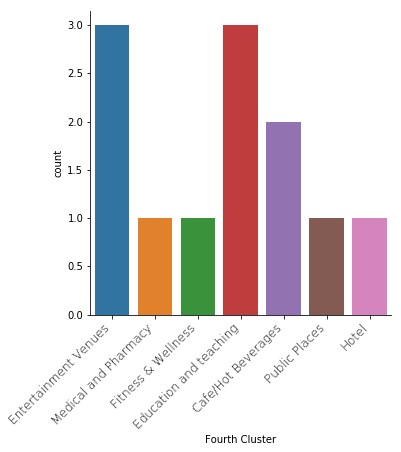

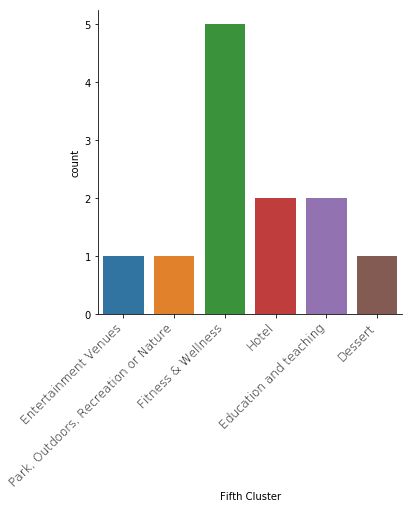

Analysing the 10th most common venue for all 5 clusters


<Figure size 1440x720 with 0 Axes>

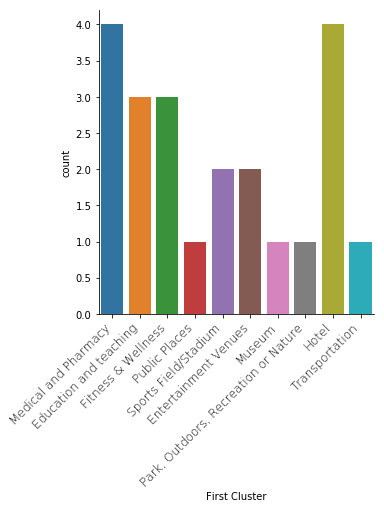

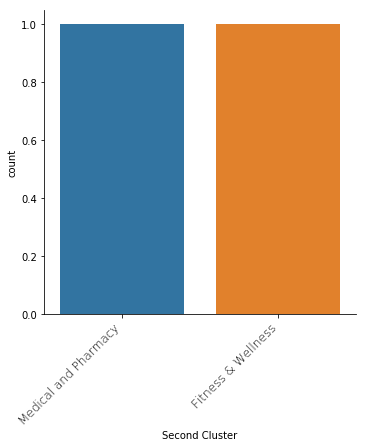

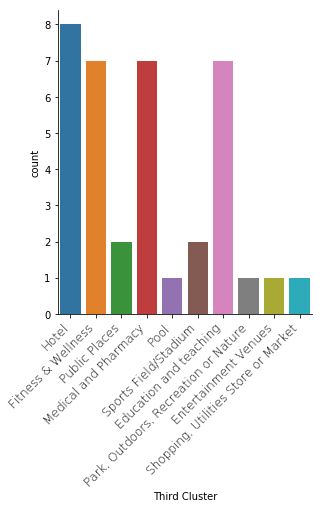

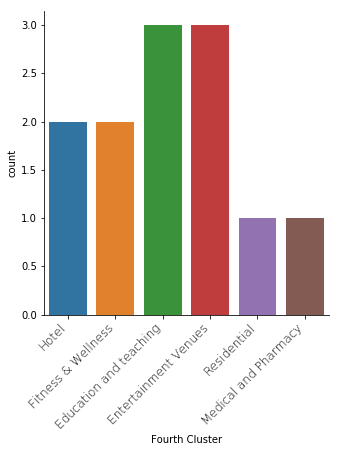

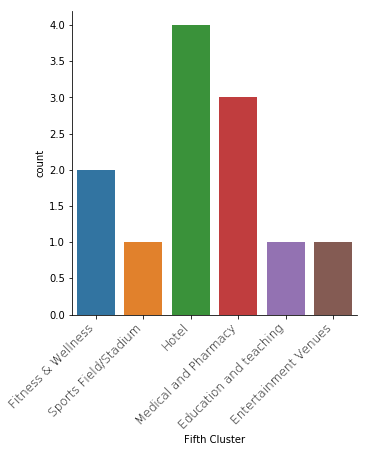

In [123]:
# Analysing all rest venue counts of most common venue categories
for i in range(7):
    print("Analysing the {}th most common venue for all 5 clusters".format(i+4)) 
    plt.figure(figsize=[20,10])
    xcol = "{}th Most Common Venue".format(i+4)
    
    sns.catplot(x=xcol,kind='count',data=mumbai_merged_copy_1)
    plt.xlabel("First Cluster")
    plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
    )
    plt.show()

    sns.catplot(x=xcol,kind='count',data=mumbai_merged_copy_2)
    plt.xlabel("Second Cluster")
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
    plt.show()

    sns.catplot(x=xcol,kind='count',data=mumbai_merged_copy_3)
    plt.xlabel("Third Cluster")
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
    plt.show()

    sns.catplot(x=xcol,kind='count',data=mumbai_merged_copy_4)
    plt.xlabel("Fourth Cluster")
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
    plt.show()

    sns.catplot(x=xcol,kind='count',data=mumbai_merged_copy_5)
    plt.xlabel("Fifth Cluster")
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
    plt.show()